<div style="text-align: center;">
  <h1 style="background-color: grey; color: white; padding: 10px;"><strong>Predicting Used Car Prices in Saudi Arabia</strong></h1>
</div>
<div style="text-align: center;">
<h4>by Shafa Salzabila Meidita </h4></div>

---

## **1. Business Understanding**

`Business Context` <br>

The used car market in Saudi Arabia is a significant contributor to the automotive industry. Economic conditions and cultural preferences drive consumer preference for used cars, which offer competitive pricing and accessible financing options. Online platforms like Syarah.com streamline transactions, providing transparency and a diverse range of vehicle choices, from practical everyday cars to luxurious SUVs. Market participants employ competitive pricing strategies to meet diverse consumer demands, ensuring robust growth and sustained high demand in the Saudi Arabian used car market.

As reported by [Mordor Intelligence](https://www.mordorintelligence.com/industry-reports/saudi-arabia-used-car-market), it is forecast that Saudi Arabia's used car market will continue to experience high demand in the future, it is therefore vital to use a machine learning model to forecast used car prices in order to optimise pricing strategies, enhance market transparency and empower buyers and sellers in the Saudi Arabian market to make well-informed decisions.

`Market Overview`
1. **Market Dynamics:** <br>
The demand for used cars in Saudi Arabia is influenced by factors such as affordability, depreciation rates, availability of financing options, and preferences for specific brands and vehicle types.
   
2. **Consumer Behavior:** <br>
Saudi consumers often prefer well-maintained used cars that offer value for money. The market includes a variety of vehicle types ranging from compact cars to luxury SUVs, catering to diverse consumer segments.

3. **Online Platforms:** <br>
Websites such as Syarah.com are essential to the Saudi used automobile market. These marketplaces make it easier to purchase and sell cars by providing comprehensive listings, comparing features, and an easy-to-use interface. They offer accessibility and transparency to a variety of vehicle options in various locations.

`Goals`

The objective is to develop a predictive model based on multiple factors that can accurately anticipate used automobile prices in Saudi Arabia. By offering reliable pricing predictions, this model will assist buyers and sellers in making well-informed decisions, thereby enhancing efficiency and transparency in the used automobile market.

`Analytical Approach`

To achieve these goals, a comprehensive analytical approach will be implemented, encompassing data collection, preprocessing, exploratory data analysis, feature engineering, model selection, training, evaluation, and deployment. The key steps in this approach are outlined below:

1. **Data Collection:**
   - **Data Sources:** The dataset includes the following attributes: Type, Region, Make, Gear Type, Origin, Options, Year, Engine Size, Mileage, Negotiable, and Price. The dataset contains 5624 records of used cars collected from syarah.com

2. **Data Preprocessing:**
   - **Data Cleaning:** Handle missing values, outliers, and inconsistencies in the dataset. Ensure data quality by standardizing formats and correcting inaccuracies.
   - **Data Transformation:** Convert categorical variables (e.g., Make, Region, Gear_Type) into numerical representations using techniques like one-hot encoding or label encoding. Scale numerical features (e.g., Mileage, Engine_Size) to ensure uniformity and improve model performance.

3. **Exploratory Data Analysis (EDA):**
   - **Descriptive Statistics:** Generate summary statistics to understand the distribution and central tendencies of the data.
   - **Visualizations:** Use visualizations (e.g., histograms, scatter plots, box plots) to identify relationships between variables, detect patterns, and gain insights into data distribution and correlations.

4. **Feature Engineering:**
   - **Feature Selection:** Identify and select relevant features that have a significant impact on the target variable (Price). This may include deriving new features from existing ones (e.g., age of the car from the Year attribute).
   - **Feature Importance:** Utilize techniques like correlation analysis, mutual information, and feature importance from tree-based models to assess the importance of different features.

5. **Model Selection and Training:**
   - **Algorithm Choice:** Consider various machine learning algorithms such as Random Forest, Gradient Boosting, and XGBoost for regression tasks. Ensemble methods can also be explored to improve predictive performance.
   - **Hyperparameter Tuning:** Employ techniques like GridSearchCV and RandomizedSearchCV to optimize hyperparameters for the chosen algorithms. Utilize cross-validation to ensure robust model evaluation.

6. **Model Evaluation:**
   - **Performance Metrics:** Evaluate model performance using metrics like Mean Absolute Percentage Error (MAPE) and Adjusted R-squared (Adjusted R2). These metrics will help assess the accuracy and reliability of the predictions.
   - **Model Validation:** Perform validation on unseen data to ensure the model generalizes well to new data and avoids overfitting.

7. **Model Deployment:**
   - **Integration:** Integrate the predictive model into the Google Cloud Platform (GCP)
   - **Monitoring and Maintenance:** Continuously monitor the model’s performance and update it with new data to maintain its accuracy over time. Implement feedback loops to refine the model based on user interactions and market changes.

By following this analytical approach, the predictive model will provide accurate and reliable used car price predictions, benefiting both consumers and industry stakeholders in the Saudi Arabian market.

`Outcome`<br>

By accurately predicting used car prices, stakeholders can:
- Stakeholders can improve their ability to make decisions by enabling sellers to set competitive rates based on vehicle condition, market trends, and other factors when used car prices are accurately predicted. This is accomplished by giving dealers the ability to accurately estimate used automobile pricing.
- Enhance the customer experience by giving customers the information they need to make educated decisions about what to buy that suit their needs and budget.
- Enhance Inventory Control by Dealers and online platforms can optimize their pricing and inventory strategies by utilizing predictive analytics.


---

## **2. Data Understanding**

### **2.1 Data Dictionary**

The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.


| **Feature**       | **Description**                                              |
|---------------|----------------------------------------------------------|
| Type          | Type of used car.                                        |
| Region        | The region in which the used car was offered for sale.   |
| Make          | The company name.                                         |
| Gear_Type     | Gear type size of used car.                               |
| Origin        | Origin of used car.                                       |
| Options       | Options of used car.                                      |
| Year          | Manufacturing year of the used car.                       |
| Engine_Size   | The engine size of the used car.                          |
| Mileage       | Mileage of the used car.                                  |
| Negotiable    | True if the price is negotiable (price is 0), otherwise False. |
| Price         | Price of the used car.                                    |

### **2.2 Data Preparation**

In [673]:
# Importing all the libraries 

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from collections import Counter

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from matplotlib.colors import ListedColormap

# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer

# Regression models
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Utilities and Miscellaneous
import time
import pickle
import sys
import warnings
warnings.filterwarnings('ignore')

In [674]:
# read dataset 
df = pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [675]:
# showing data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [676]:
# showing columns name 
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

In [677]:
# define the categorical columns 
cat_cols = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

In [678]:
# define the numerical columns 
num_cols = ['Year', 'Engine_Size', 'Mileage', 'Price']

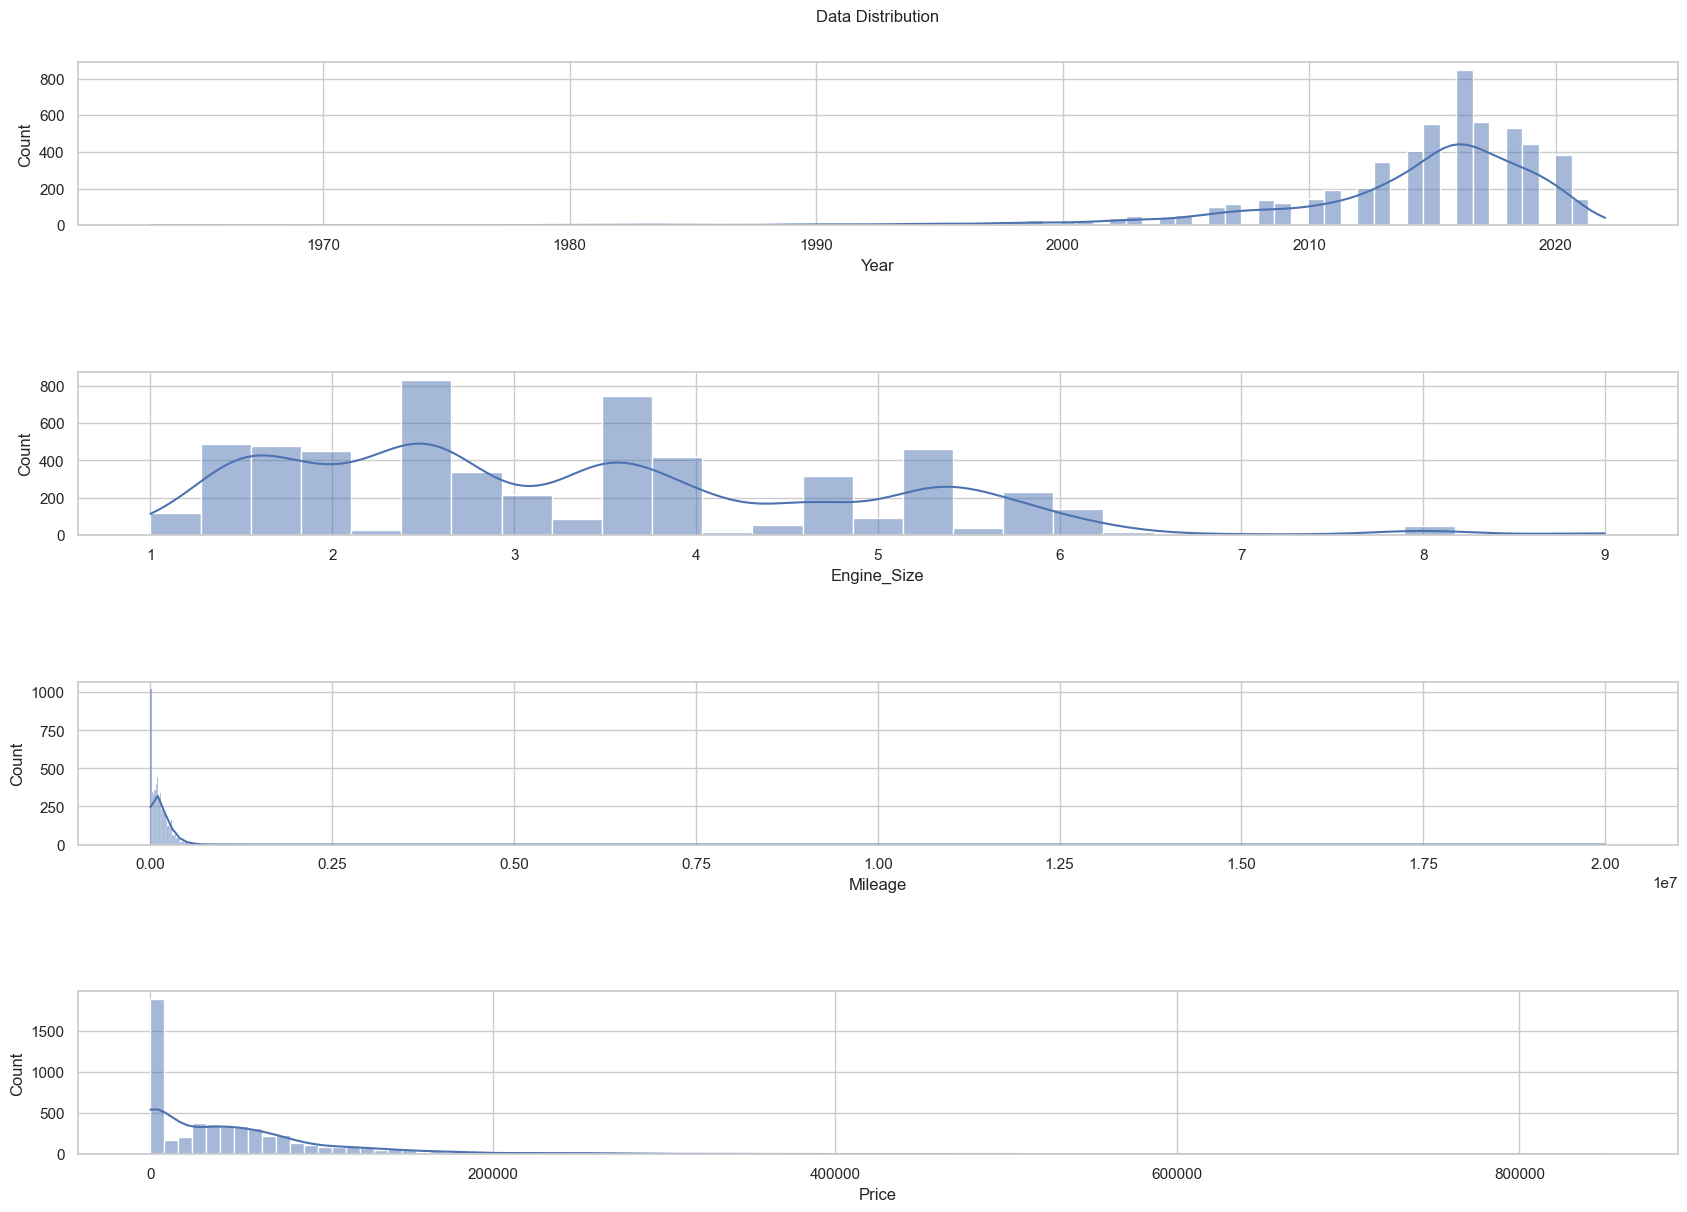

In [679]:
# Distribution visualizations 
fig, ax = plt.subplots(4,1, figsize = (20,14))

for i, col in enumerate(num_cols):
    sns.histplot(x=col, 
                 data=df, 
                 kde=True, 
                 ax=ax[i])

ax[0].set_title('Data Distribution', y=1.2)
plt.subplots_adjust(left=0.1, bottom =0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()

---

### **2.3 Data Cleaning**

#### `Missing Values `

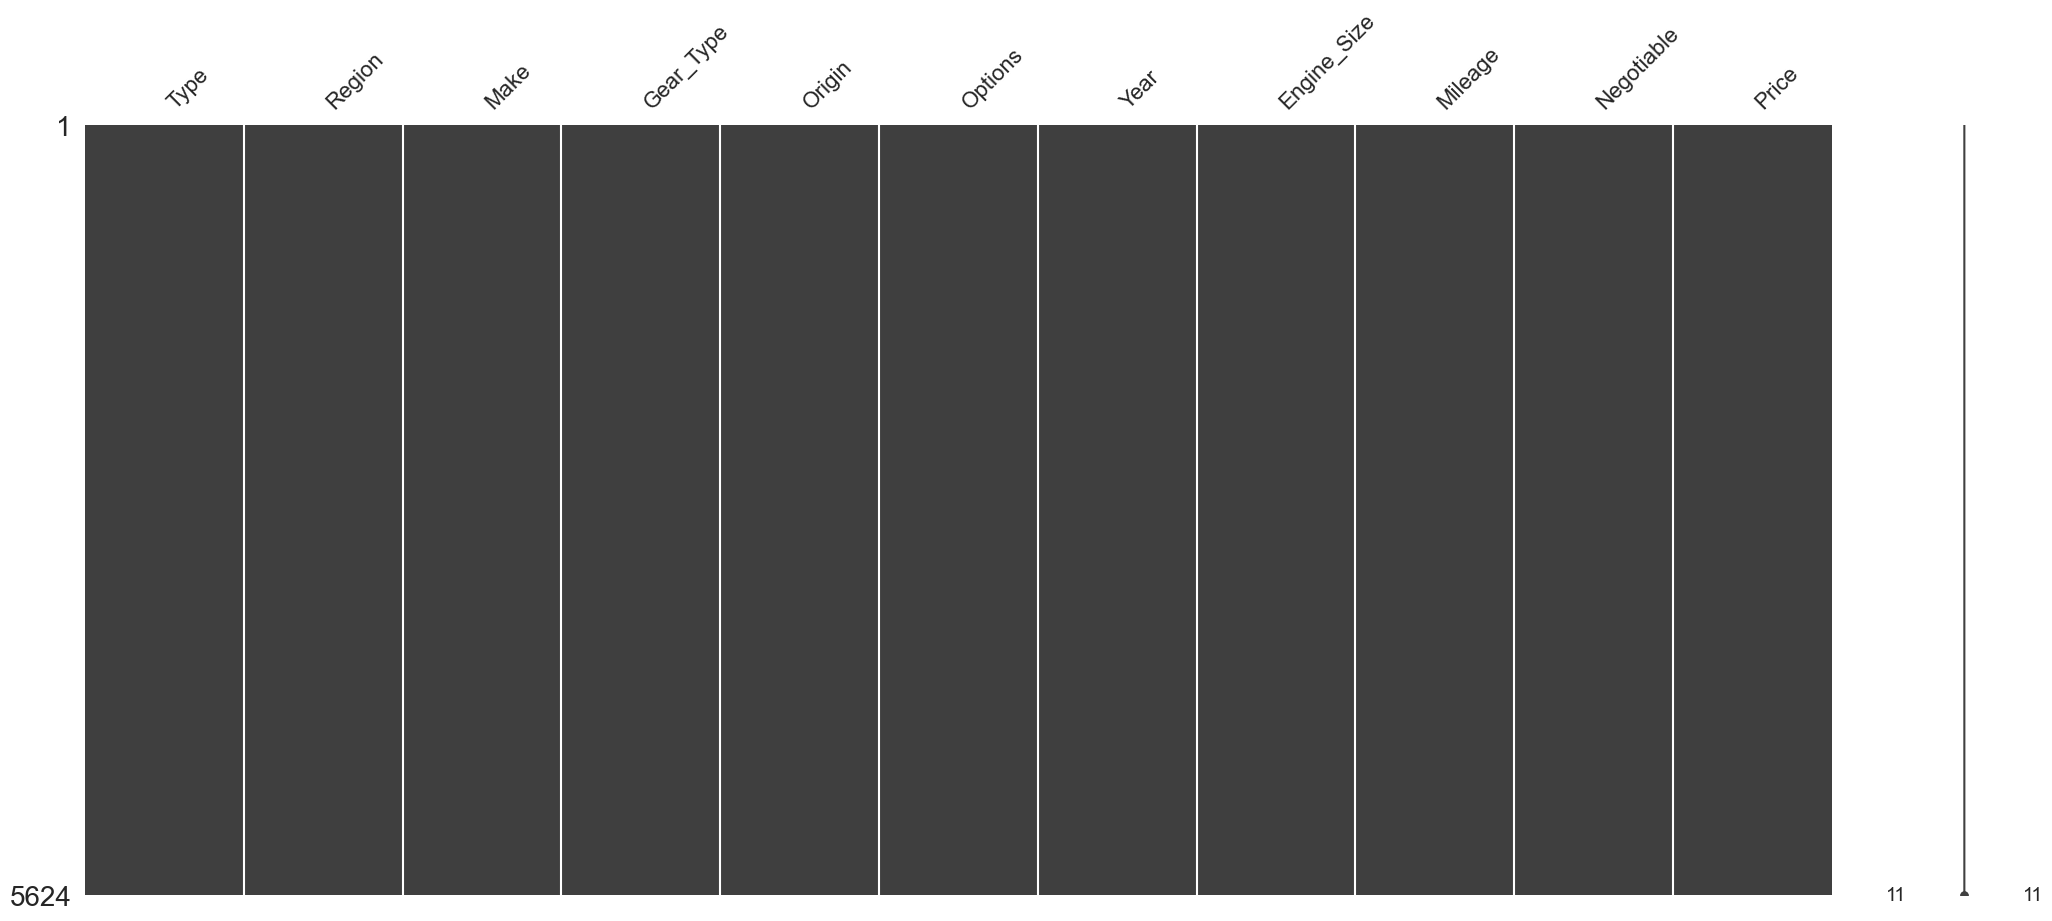

In [680]:
# missing values visualizations
msn.matrix(df)
plt.show()

In [681]:
# counting missing values 
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [682]:
# inspecting the value on column origin
df['Origin'].value_counts()

Origin
Saudi          4188
Gulf Arabic     697
Other           678
Unknown          61
Name: count, dtype: int64

In [683]:
# Dropping the unknown data 
df.drop(index=df[(df['Origin'] == 'Unknown')].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Showing the updated dataframe
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5558,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5559,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5560,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5561,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [684]:
# re-checking the value counts of column origin
df['Origin'].value_counts()

Origin
Saudi          4188
Gulf Arabic     697
Other           678
Name: count, dtype: int64

#### `Duplicated Data`

In [685]:
# counting the duplicated data 
df.duplicated().sum()

4

In [686]:
# checking the duplicated data 
df[df.duplicated(keep=False) == True].sort_values('Type')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3583,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0
5212,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0
531,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
939,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
234,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4593,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
1984,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
4879,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000


In [687]:
# define the duplicated rows
duplicate_rows = df[df.duplicated(keep='first') == True]
duplicate_rows

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
939,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4593,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4879,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5212,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [688]:
# drop the duplicate rows 
df.drop_duplicates(subset=duplicate_rows, inplace=True, ignore_index=True)

In [689]:
# re-counting the duplicated data
df.duplicated().sum()

0

In [690]:
# showing the updated dataframe
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5554,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5555,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5556,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5557,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


#### `Removing Data and Handling Outliers`

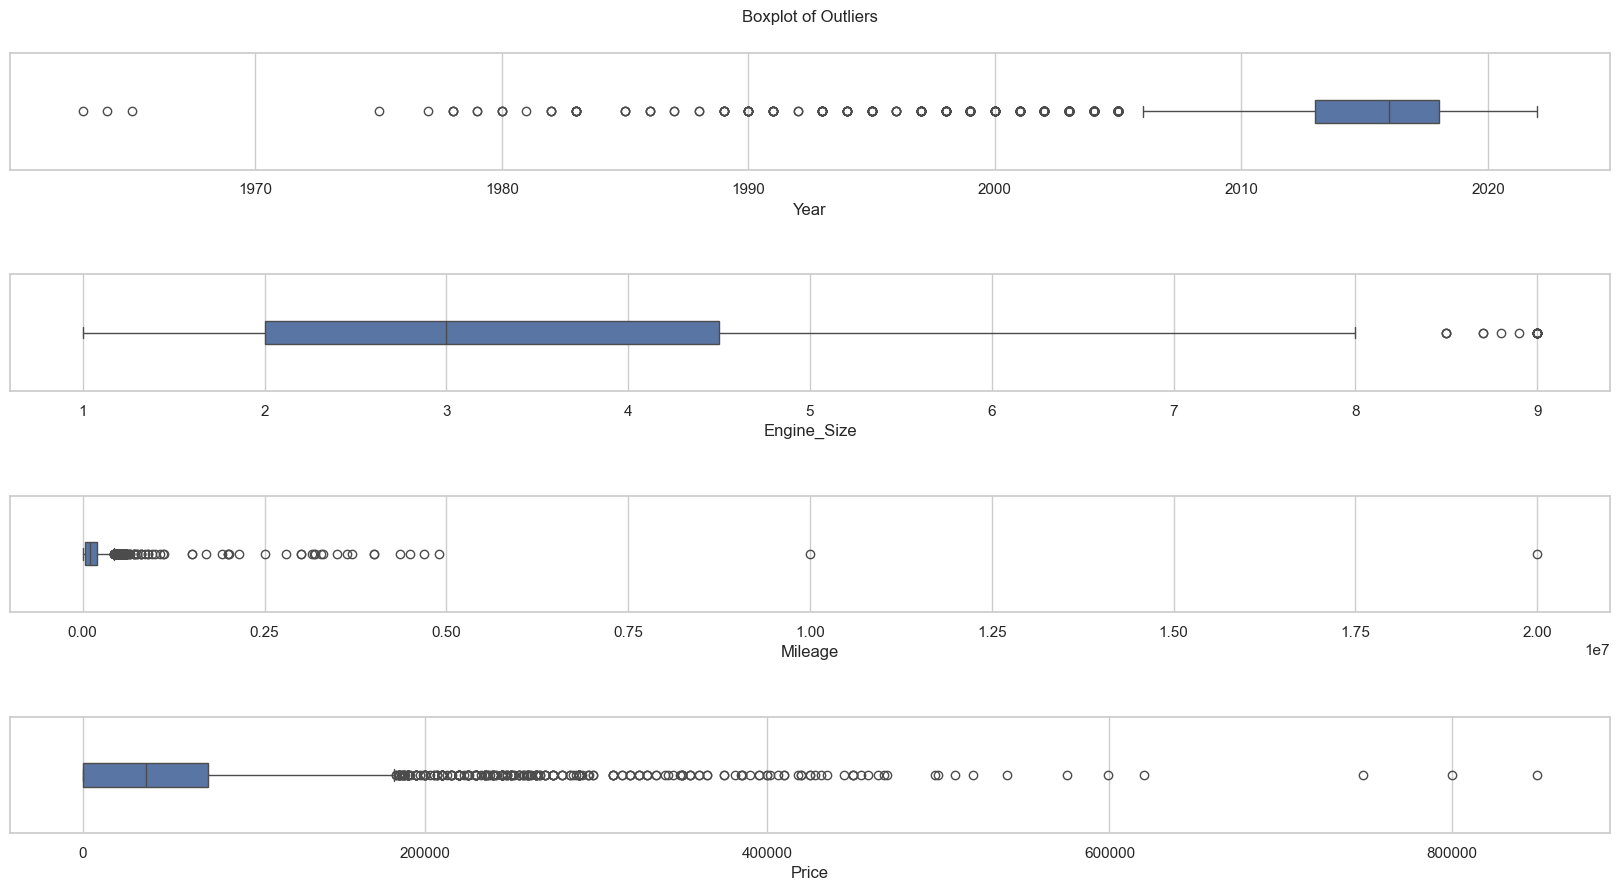

In [691]:
# Showing the Outliers using Boxplot
 
fig, ax = plt.subplots(4,1, figsize = (20,10))

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, 
                 data=df, 
                 width=0.2, 
                 ax=ax[i])

ax[0].set_title('Boxplot of Outliers', y=1.2)
plt.subplots_adjust(left=0.1, bottom =0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()

The boxplot visualizations reveal outliers across several features in the dataset. The "Year" variable shows most cars from the 1980s to the 2010s, with outliers before 1970 and after 2020. The "Engine_Size" is predominantly between 2 to 3 liters, with some outliers below 2 and above 4 liters. The "Mileage" mostly clusters around the lower end, indicating many cars with low mileage, but significant outliers have exceptionally high mileage. The "Price" generally falls below 200,000, with numerous outliers extending up to 600,000 and beyond, indicating a wide range of car prices in the dataset.

In [692]:
# showing amount of the outliers 

def calculate_outliers(data,column): 
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
outlier_data = []

for i in num_cols: 
    outliers_result, lower_bound, upper_bound = calculate_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df[i]*100),2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])


outlier_df = pd.DataFrame(outlier_data, columns=['column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'])
outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,Year,391,0.07,2005.50,2025.50
1,Engine_Size,23,0.00,-1.75,8.25
2,Mileage,176,0.03,-198282.50,429937.50
3,Price,261,0.05,-109500.00,182500.00


In [693]:
# showing the descriptive statistics summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5559.0,2014.119266,5.777385,1963.0,2013.0,2016.0,2018.0,2022.0
Engine_Size,5559.0,3.294945,1.518333,1.0,2.0,3.0,4.5,9.0
Mileage,5559.0,150370.549559,384758.456156,100.0,37300.0,102000.0,194355.0,20000000.0
Price,5559.0,53505.053607,70358.316560,0.0,0.0,37000.0,73000.0,850000.0


In [694]:
# Inspecting 0 Values in Price
df[df['Negotiable'] == True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5545,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5549,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5552,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5555,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [695]:
# Inspecting other anomalies value in Price
df[df['Price'] != 0].sort_values(by= 'Price', ascending=True).head(5)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3088,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,False,1
3941,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,False,500
4345,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,False,850
5070,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,False,884
3427,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,False,950


Based on the data above, I will not drop any outliers data in this process because the identified outliers may not reflect unusual or incorrect conditions within the context of the dataset. The lower bounds for certain columns, such as Price, Mileage, and Engine_Size, include negative values, which are not possible in a real-world scenario. A price of 0, 1 and also 20.000.000 km of mileage is not realistic for used cars. Hence, these numbers may represent data entry errors or extreme cases that need different handling rather than outright removal. This suggests that we should consider the validity of outliers based on domain knowledge and valid data from the main sources which is Syarah.com first before handling the outliers

By setting thresholds based on valid data from Syarah.com (a reliable source for Saudi Arabia used cars), we can ensure that our data remains representative of the actual market. This approach allows us to maintain the integrity of the dataset by removing only those entries that fall outside the realistic range defined by this external source.


**Price and Mileage Threshold by Website Syarah.com** (*captured on 23rd of June 2024*)<br><br> 
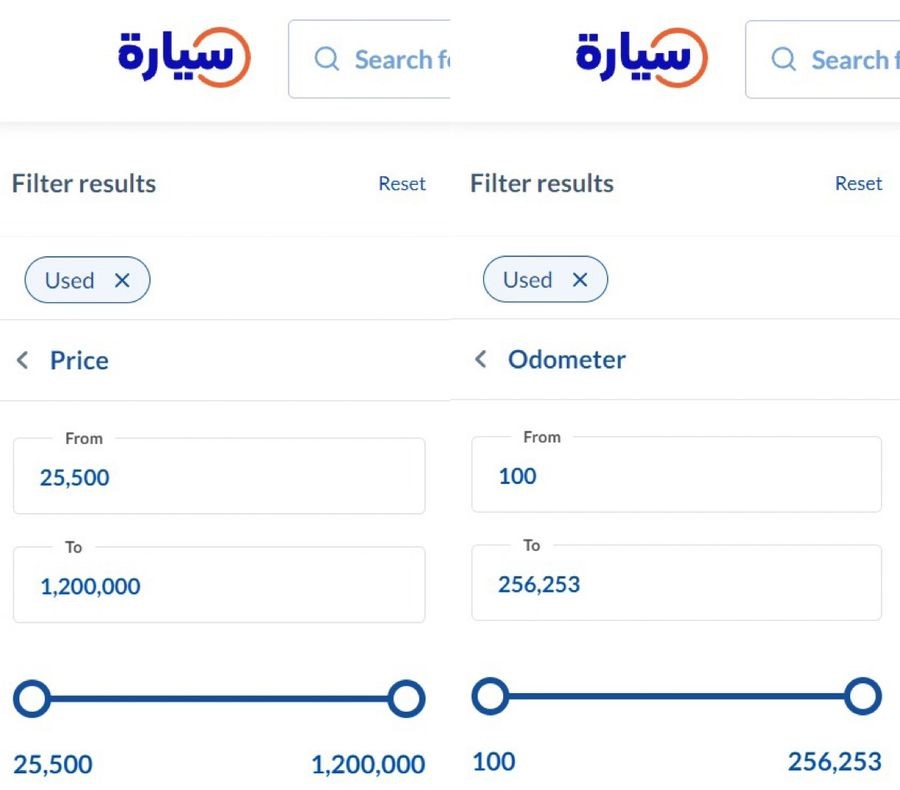 <br>
*captured on 23rd of June 2024*

**Year and Engine Size Threshold by Website Syarah.com** (*captured on 23rd of June 2024*)<br><br> 
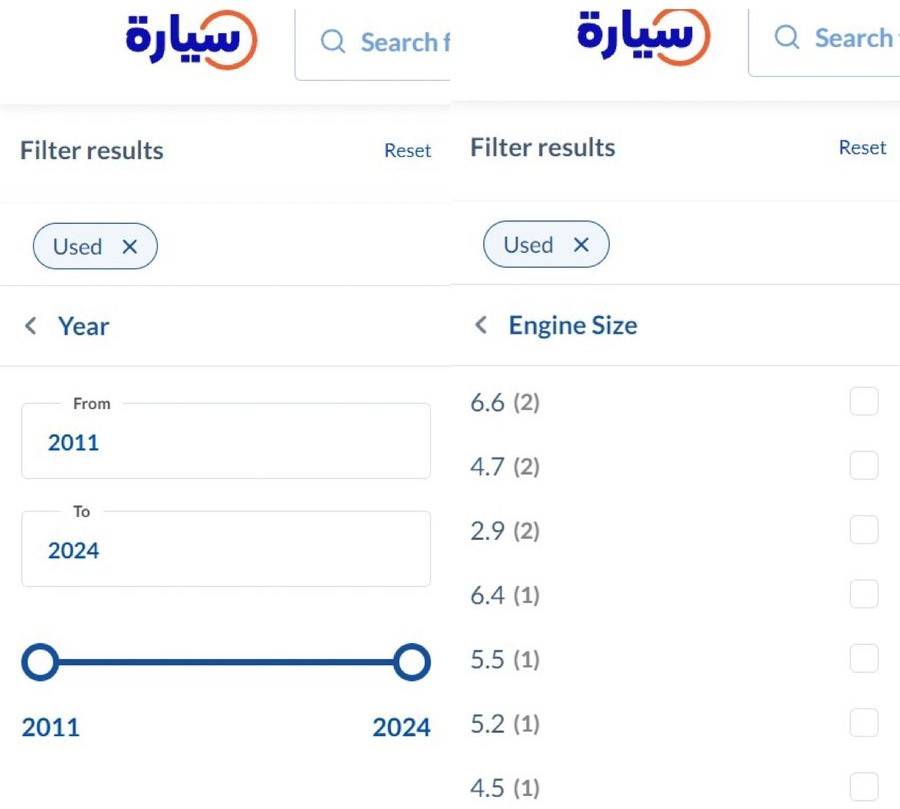 <br>

> Threshold based on the Website **Syarah.com** <br>
> - Price : 25.500 - 1.200.000 SAR
> - Mileage : 100 - 256253 
> - Year : 2011 - 2024 
> - Engine Size : 1.0 - 6.6 

In [696]:
# defining the threshold based on Syarah.com
threshhold = (df['Price'] >= 25500) & (df['Price'] <= 1200000)& (df['Mileage'] >= 100) & (df['Mileage'] <= 256253) & (df['Year'] >= 2011) & (df['Engine_Size'] <= 6.6)

In [697]:
# Dataframe inside the threshold
df_threshold = df[threshhold]
df_threshold

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
...,...,...,...,...,...,...,...,...,...,...,...
5550,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,False,56000
5551,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5554,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5556,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [698]:
# Access the dataframe outside the threshold
outside_threshold = df[~(threshhold)]
outside_threshold

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
12,LS,Dammam,Lexus,Automatic,Saudi,Full,2008,4.6,299000,False,38000
...,...,...,...,...,...,...,...,...,...,...,...
5549,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5552,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5553,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5555,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [699]:
# dropping the data outside the threshold 
df.drop(outside_threshold.index, inplace=True)
df.reset_index(drop=True, inplace=True)


In [700]:
# Re-checking the outlier after dropping data based on the threshold

def calculate_outliers(data,column): 
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
outlier_data = []

for i in num_cols: 
    outliers_result, lower_bound, upper_bound = calculate_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df[i]*100),2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])


outlier_df = pd.DataFrame(outlier_data, columns=['column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'])
outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,Year,0,0.00,2010.5,2022.5
1,Engine_Size,1,0.00,-0.7,6.5
2,Mileage,0,0.00,-98000.0,278000.0
3,Price,207,0.07,-45000.0,203000.0


> Remaining Outliers: <br>
> - Price : 207 Ouliers 
> - Mileage : 1 Outlier 
<br>

lets see the outlier position with the boxplot visualizations below: 

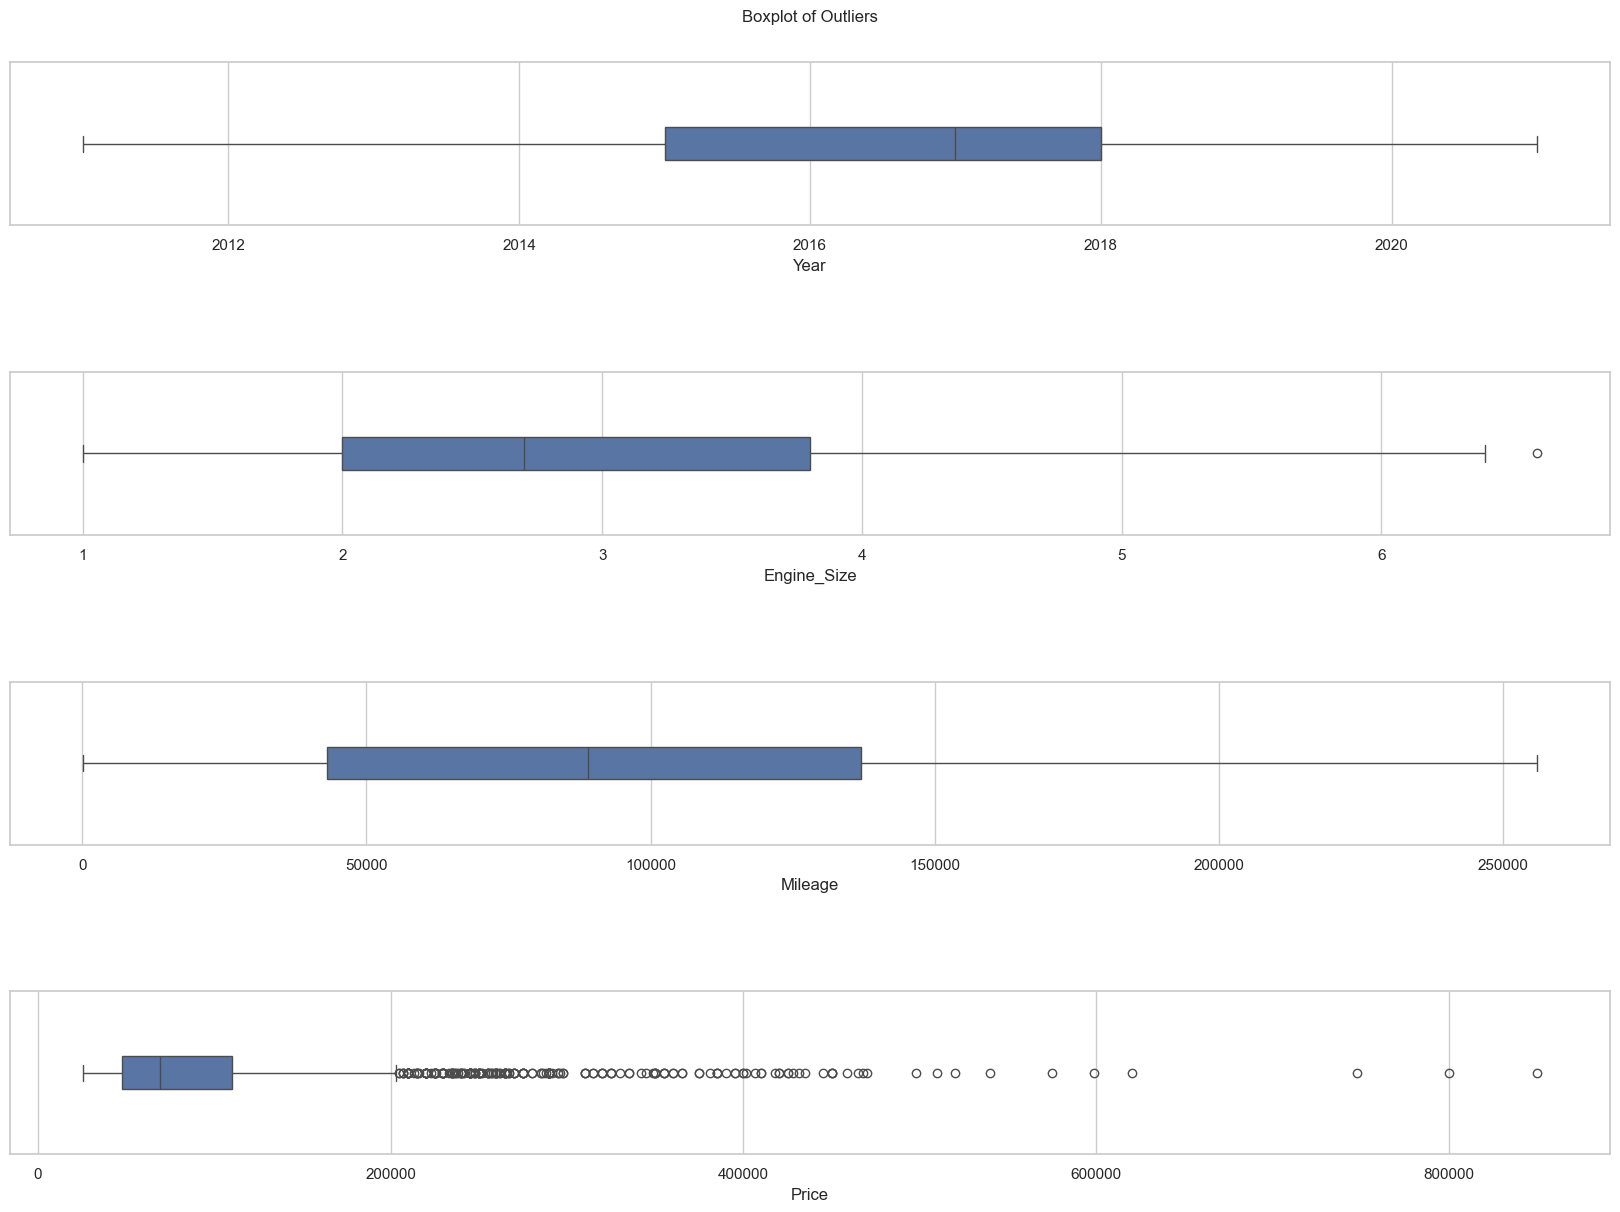

In [701]:
# Showing the Outliers using Boxplot
 
fig, ax = plt.subplots(4,1, figsize = (20,14))

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, 
                 data=df, 
                 width=0.2, 
                 ax=ax[i])

ax[0].set_title('Boxplot of Outliers', y=1.2)
plt.subplots_adjust(left=0.1, bottom =0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()

After dropping several data based on the threshold and checking amount of the outliers left, we can see from the boxplot visualization that the remaining outliers is outside the upper bound of the column Engine_Size and Price. However, **I will not remove the outliers** data because the outliers data mostly in the target variable (Price) and it might be useful for price prediction of used cars in Saudi Arabia.

In [702]:
# Inspecting and Re-checking the 0 Values in Price after dropping the data based on the threshold
df[df['Negotiable'] == True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In [703]:
# Because there is no 0 Values in price anymore, so i drop Negotiable columns, because i dont use the column for my future analysis 
df.drop(columns='Negotiable', inplace=True)

In [704]:
# showing the updated dataframe 
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
2800,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,56000
2801,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
2802,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
2803,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


In [705]:
# Showing the updated data of Year, Engine Size, Mileage, and Price 
# Sorting by the lowest 
 
for col in num_cols:
    display(df[[col]].sort_values(by=col, ascending=True))

,Year
1929,2011
203,2011
574,2011
301,2011
478,2011
...,...
2380,2021
2612,2021
2177,2021
960,2021


,Engine_Size
498,1.0
2384,1.0
1229,1.0
1843,1.0
689,1.0
...,...
1170,6.4
2173,6.4
2099,6.4
1804,6.4


,Mileage
1728,100
2118,100
615,100
1520,100
543,100
...,...
2624,255000
2038,255000
1565,255000
253,256000


,Price
1664,25500
915,25500
1169,25500
540,26000
1057,26000
...,...
2328,599000
1026,620000
2135,748000
2342,800000


#### `Renaming Columns`

In [706]:
df.rename(columns={
    'Type': 'Car Type',
    'Make': 'Manufacturer',
    'Gear_Type': 'Transmission',
    'Origin': 'Country Origin',
    'Options': 'Package',
    'Engine_Size' : 'Engine Size'
}, inplace=True)

df

,Car Type,Region,Manufacturer,Transmission,Country Origin,Package,Year,Engine Size,Mileage,Price
0,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
2800,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,56000
2801,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
2802,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
2803,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


#### `Switching Columns Order`

In [707]:
df.columns

Index(['Car Type', 'Region', 'Manufacturer', 'Transmission', 'Country Origin',
       'Package', 'Year', 'Engine Size', 'Mileage', 'Price'],
      dtype='object')

In [708]:
# switching the columns order
df = df.loc[:, ['Car Type', 'Manufacturer', 'Transmission', 'Package',  'Region', 
                'Country Origin', 'Year', 'Engine Size', 'Mileage', 'Price']]

# showing the updated dataframe
df

,Car Type,Manufacturer,Transmission,Package,Region,Country Origin,Year,Engine Size,Mileage,Price
0,Range Rover,Land Rover,Automatic,Full,Riyadh,Gulf Arabic,2015,5.0,140000,260000
1,Optima,Kia,Automatic,Semi Full,Hafar Al-Batin,Saudi,2015,2.4,220000,42000
2,CX3,Mazda,Automatic,Semi Full,Abha,Saudi,2019,2.0,25000,58000
3,Cayenne S,Porsche,Automatic,Full,Riyadh,Saudi,2012,4.8,189000,85000
4,Sonata,Hyundai,Automatic,Full,Riyadh,Saudi,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
2800,6,Mazda,Automatic,Semi Full,Jeddah,Saudi,2017,2.5,106000,56000
2801,CX9,Mazda,Automatic,Full,Qassim,Saudi,2020,2.0,9500,132000
2802,X-Trail,Nissan,Automatic,Standard,Jeddah,Saudi,2018,2.5,78794,68000
2803,Yukon,GMC,Automatic,Full,Dammam,Saudi,2016,5.3,48000,145000


#### `Finalizing and Saving the Cleaned Data`

In [709]:
# save to CSV format 
df.to_csv('SaudiArabia_Used_Cars_Clean.csv', index=False)

---

### **2.4 Exploratory Data Analysis**

In [710]:
df

,Car Type,Manufacturer,Transmission,Package,Region,Country Origin,Year,Engine Size,Mileage,Price
0,Range Rover,Land Rover,Automatic,Full,Riyadh,Gulf Arabic,2015,5.0,140000,260000
1,Optima,Kia,Automatic,Semi Full,Hafar Al-Batin,Saudi,2015,2.4,220000,42000
2,CX3,Mazda,Automatic,Semi Full,Abha,Saudi,2019,2.0,25000,58000
3,Cayenne S,Porsche,Automatic,Full,Riyadh,Saudi,2012,4.8,189000,85000
4,Sonata,Hyundai,Automatic,Full,Riyadh,Saudi,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
2800,6,Mazda,Automatic,Semi Full,Jeddah,Saudi,2017,2.5,106000,56000
2801,CX9,Mazda,Automatic,Full,Qassim,Saudi,2020,2.0,9500,132000
2802,X-Trail,Nissan,Automatic,Standard,Jeddah,Saudi,2018,2.5,78794,68000
2803,Yukon,GMC,Automatic,Full,Dammam,Saudi,2016,5.3,48000,145000


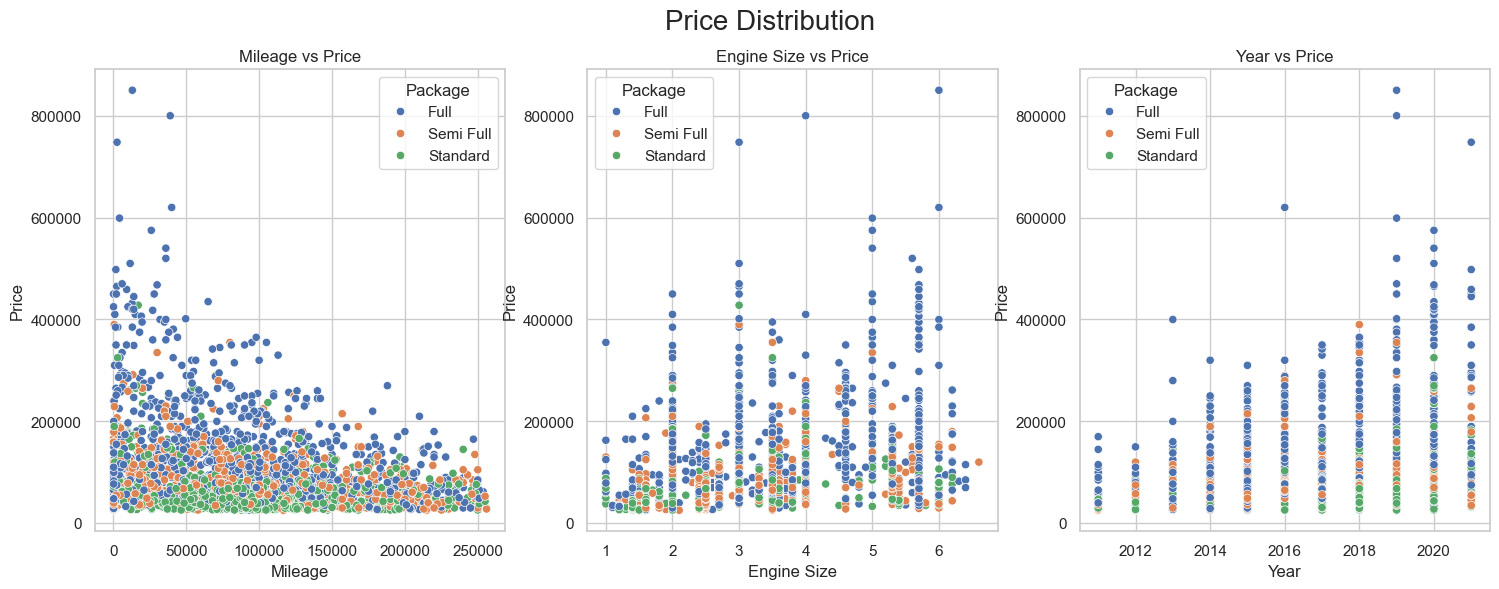

In [711]:
# Showing the Price Distribution by the Package 

figure, axes = plt.subplots(1, 3, figsize=(18, 6))
figure.suptitle('Price Distribution', size=20)

# Plotting the first subplot (Mileage vs Price)
sns.scatterplot(data=df, 
                x='Mileage', 
                y='Price',
                hue = 'Package', 
                ax=axes[0])
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Price')
axes[0].set_title('Mileage vs Price')

# Plotting the second subplot (Engine Size vs Price)
sns.scatterplot(data=df, 
                x='Engine Size', 
                y='Price', 
                hue = 'Package',
                ax=axes[1])
axes[1].set_xlabel('Engine Size')
axes[1].set_ylabel('Price')
axes[1].set_title('Engine Size vs Price')

# Plotting the second subplot (Year vs Price)
sns.scatterplot(data=df, 
                x='Year', 
                y='Price', 
                hue = 'Package',
                ax=axes[2])
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Price')
axes[2].set_title('Year vs Price')

plt.show()

The scatter plots provided illustrate the relationship between car prices and three variables: mileage, engine size, and year of manufacture, categorized by package types (Full, Semi Full, and Standard).

1. **Mileage vs. Price**:
   - There is a noticeable negative correlation between mileage and price, indicating that cars with lower mileage generally have higher prices. Full package cars (red dots) tend to maintain higher prices across various mileage ranges compared to Semi Full (blue dots) and Standard (purple dots) packages.

2. **Engine Size vs. Price**:
   - The relationship between engine size and price shows some variability. Larger engine sizes generally correspond to higher prices, particularly for Full package cars. However, there are outliers with high prices across all package types, suggesting that other factors besides engine size may significantly influence price.

3. **Year vs. Price**:
   - There is a clear positive correlation between the year of manufacture and car price. Newer cars (from 2016 onwards) tend to have higher prices. Full package cars consistently show higher prices across all years compared to Semi Full and Standard packages.

Overall, Full package cars command higher prices across all three variables (mileage, engine size, and year). The data suggests that newer cars, cars with larger engines, and cars with lower mileage are generally more expensive, and the package type further influences the price, with Full packages being the most expensive.

In [712]:
# Using group by for barplot visualization
region_avg_price = df.groupby('Region')['Price'].mean().reset_index().sort_values('Price', ascending=False)
country_avg_price= df.groupby('Country Origin')['Price'].mean().reset_index().sort_values('Price', ascending=False)
manufacturer_avg_price= df.groupby('Manufacturer')['Price'].mean().reset_index().sort_values('Price', ascending=False)

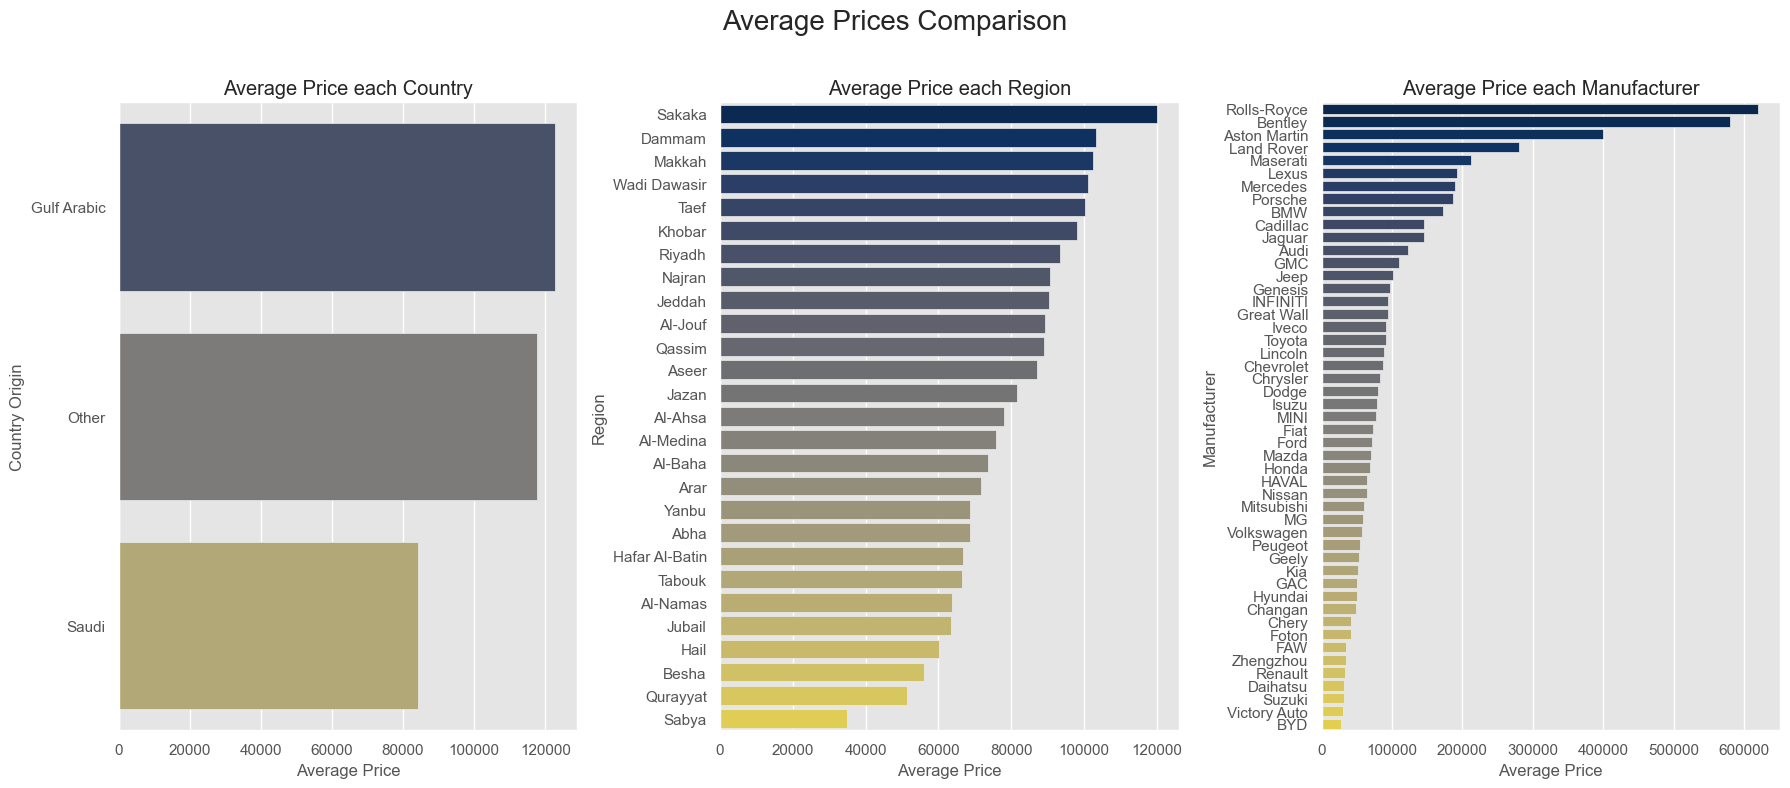

In [713]:
# Average Price Comparison for several feature 
# Visualizations using barplot 

plt.style.use('ggplot')

# Create the figure and axes
figure, axes = plt.subplots(1, 3, figsize=(18, 8))
figure.suptitle('Average Prices Comparison\n', size=20)

# Plotting the first subplot (Average Price by Region)
sns.barplot(data=country_avg_price, 
            y='Country Origin',
            x='Price', 
            palette='cividis',
            ax=axes[0])
axes[0].set_xlabel('Average Price')
axes[0].set_title('Average Price each Country')

sns.barplot(data=region_avg_price, 
            y='Region', 
            x='Price', 
            palette= 'cividis',
            ax=axes[1])
axes[1].set_xlabel('Average Price')
axes[1].set_title('Average Price each Region')

sns.barplot(data=manufacturer_avg_price, 
            y='Manufacturer',
            x='Price',
            palette= 'cividis',
            ax=axes[2])
axes[2].set_xlabel('Average Price')
axes[2].set_title('Average Price each Manufacturer')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

The provided visualizations offer a detailed comparison of average car prices across different categories in the Saudi Arabian used car market.

1. **Average Price by Country of Origin**: Cars originating from the Gulf region have the highest average prices, followed by cars categorized as "Other" origins. Saudi-made cars have the lowest average prices among the three categories.

2. **Average Price by Region**: Sakaka tops the list with the highest average car prices, followed by Dammam and Makkah. Regions like Sabya, Qurayyat, and Besha have the lowest average prices, indicating significant regional price variations within Saudi Arabia.

3. **Average Price by Manufacturer**: High-end luxury brands such as Rolls-Royce, Bentley, and Aston Martin command the highest average prices, reflecting their premium status. In contrast, more budget-friendly brands like BYD, Victory Auto, and Suzuki have the lowest average prices, suggesting they are more affordable options in the market.

These insights highlight the diversity in pricing across different origins, regions, and manufacturers, reflecting varying market dynamics and consumer preferences in the Saudi Arabian used car market.

In [714]:
# value counts several categories 
count_cols =  ['Transmission', 'Country Origin', 'Package']

In [715]:
# showing the value counts 
for i in count_cols: 
    display(df[i].value_counts().reset_index())

,Transmission,count
0,Automatic,2601
1,Manual,204


,Country Origin,count
0,Saudi,2123
1,Gulf Arabic,428
2,Other,254


,Package,count
0,Full,1103
1,Standard,972
2,Semi Full,730


In [716]:
# Value counts for pie chart visualizations
pie_transmission = df['Transmission'].value_counts().reset_index()
pie_origin = df['Country Origin'].value_counts().reset_index()
pie_package = df['Package'].value_counts().reset_index()

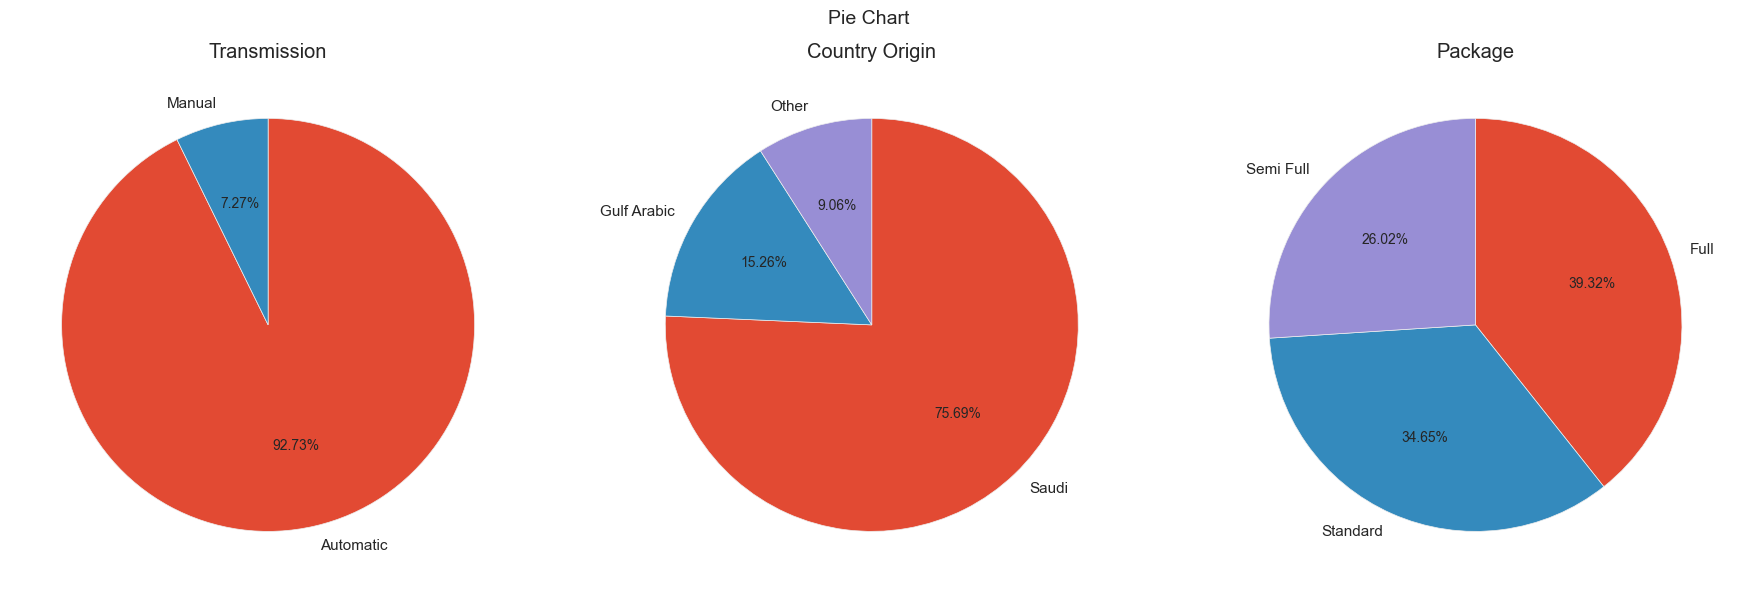

In [717]:
# Pie chart visualization for categorical data 

# Create subplots
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
figure.suptitle('Pie Chart \n', size=14)

# Plot the pie charts
axes[0].pie(x=pie_transmission['count'], 
            labels=pie_transmission['Transmission'], 
            startangle=90, 
            counterclock=False, 
            autopct='%.2f%%')
axes[0].set_title('Transmission')

axes[1].pie(x=pie_origin['count'], 
            labels=pie_origin['Country Origin'], 
            startangle=90, 
            counterclock=False, 
            autopct='%.2f%%')
axes[1].set_title('Country Origin')

axes[2].pie(x=pie_package['count'], 
            labels=pie_package['Package'], 
            startangle=90, 
            counterclock=False, 
            autopct='%.2f%%')
axes[2].set_title('Package')

# Adjust layout
plt.tight_layout()
plt.show()

The pie charts offer valuable insights into consumer preferences and market trends in the Saudi Arabian used car market. 

1. **Transmission Type**: 
   The data reveals that the vast majority (92.73%) of used cars have automatic transmissions, indicating a strong consumer preference for the convenience they offer over manual transmissions (7.27%).

2. **Country of Origin**:
   The majority of used cars (75.69%) are locally manufactured in Saudi Arabia, with a smaller proportion originating from Gulf Arabic countries (15.26%) and other regions (9.06%). This indicates a preference for vehicles produced domestically and in the region, likely due to better alignment with local needs and servicing capabilities.

3. **Package Options**:
- The market demonstrates a higher demand for 'Full' package options (39.32%), followed by 'Standard' (34.65%) and 'Semi Full' (26.02%). Consumers appear to value the additional features provided by the 'Full' packages.

These insights highlight the dominant trends in the Saudi Arabian used car market, focusing on automatic transmissions, local and regional vehicles, and comprehensive package options.

In [718]:
df.columns

Index(['Car Type', 'Manufacturer', 'Transmission', 'Package', 'Region',
       'Country Origin', 'Year', 'Engine Size', 'Mileage', 'Price'],
      dtype='object')

In [719]:
# Correlation between price and other numerical columns
corr = df[['Price', 'Engine Size', 'Mileage', 'Year']].corr()
corr

,Price,Engine Size,Mileage,Year
Price,1.000000,0.402416,-0.259629,0.260696
Engine Size,0.402416,1.000000,0.150644,-0.313558
Mileage,-0.259629,0.150644,1.000000,-0.472030
Year,0.260696,-0.313558,-0.472030,1.000000


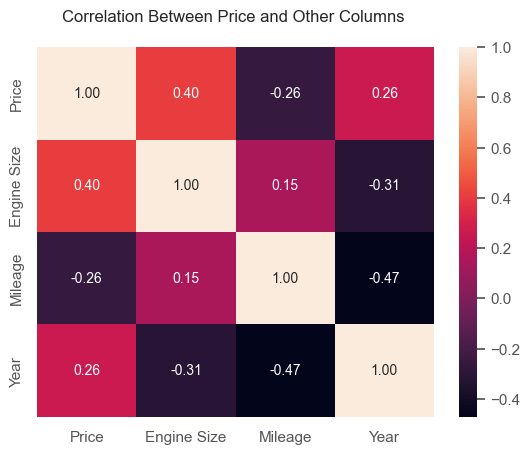

In [720]:
# Correlation matrix visualization using Heatmap

sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Between Price and Other Columns \n', size = 12)
plt.show()

The heatmap shows the correlation between car prices and other variables like Engine Size, Mileage, and Year. The key highlights are:
- **Price and Engine Size** have a moderate positive correlation (0.40), indicating that as engine size increases, the price tends to increase.
- **Price and Mileage** have a weak negative correlation (-0.26), suggesting that higher mileage slightly decreases the price.
- **Price and Year** show a weak positive correlation (0.26), implying that newer cars tend to be priced higher.
- **Mileage and Year** have a moderate negative correlation (-0.47), indicating that newer cars generally have lower mileage.

---

## **3. Machine Learning Model**

#### **3.1 Feature Engineering** 

> *"Coming up with features is difficult, time-consuming, requires expert knowledge. ‘Applied machine learning’ is basically feature engineering."* - Andrew Ng

Feature engineering involves using domain knowledge to extract, transform, and create new features from raw data, aiming to improve machine learning model performance. It includes selecting relevant variables, creating new features through techniques like normalization and encoding, and removing redundant or irrelevant features to enhance predictive accuracy.

##### `Adding New Features`

In [721]:
# checking the value counts of columns Manufacturer
df['Manufacturer'].value_counts()

Manufacturer
Toyota          656
Hyundai         416
Ford            230
Chevrolet       185
Nissan          172
Mercedes        137
Kia             133
Lexus           124
GMC              89
Mazda            80
Honda            67
Mitsubishi       59
BMW              57
Dodge            53
Land Rover       51
Jeep             31
Chrysler         27
Genesis          27
Audi             25
Changan          24
Cadillac         17
Volkswagen       14
Geely            14
Renault          13
MG               13
Porsche          13
HAVAL             9
INFINITI          9
Jaguar            7
MINI              7
Lincoln           7
Fiat              5
Suzuki            4
Isuzu             4
Peugeot           4
Maserati          3
GAC               3
Bentley           2
Foton             2
Daihatsu          2
Zhengzhou         2
Rolls-Royce       1
Chery             1
Victory Auto      1
BYD               1
Iveco             1
Aston Martin      1
FAW               1
Great Wall        1
Name: c

> ***Country of manufacturer*** refers to the country where a product or item was manufactured or produced

In [722]:
# defining the country manufacturer
country_manufacturer = {
    'Land Rover': 'United Kingdom',
    'Kia': 'South Korea',
    'Mazda': 'Japan',
    'Porsche': 'German',
    'Hyundai': 'South Korea',
    'Toyota': 'Japan',
    'Chrysler': 'USA',
    'Mitsubishi': 'Japan',
    'MG': 'United Kingdom',
    'Chevrolet': 'USA',
    'Mercedes': 'German',
    'BMW': 'German',
    'Jeep': 'USA',
    'Lincoln': 'USA',
    'Nissan': 'Japan',
    'GMC': 'USA',
    'Ford': 'USA',
    'Genesis': 'South Korea',
    'Zhengzhou': 'Tiongkok',
    'Dodge': 'USA',
    'HAVAL': 'Tiongkok',
    'Lexus': 'Japan',
    'Changan': 'Tiongkok',
    'Aston Martin': 'United Kingdom',
    'Cadillac': 'France',
    'INFINITI': 'Japan',
    'Honda': 'Japan',
    'Audi': 'German',
    'BYD': 'Tiongkok',
    'Volkswagen': 'German',
    'Victory Auto': 'Tiongkok',
    'Suzuki': 'Japan',
    'Renault': 'France',
    'Geely': 'Tiongkok',
    'Isuzu': 'Japan',
    'Daihatsu': 'Japan',
    'Maserati': 'Italy',
    'GAC': 'Tiongkok',
    'Chery': 'Tiongkok',
    'Jaguar': 'United Kingdom',
    'Rolls-Royce': 'United Kingdom',
    'Peugeot': 'France',
    'Foton': 'Tiongkok',
    'MINI': 'United Kingdom',
    'Fiat': 'Italy',
    'Iveco': 'Italy',
    'Bentley': 'United Kingdom',
    'FAW': 'Tiongkok',
    'Great Wall': 'Tiongkok'
}

In [723]:
# mapping manufacturer into country manufacturer
df['Country Manufacturer'] = df['Manufacturer'].map(country_manufacturer)
df

,Car Type,Manufacturer,Transmission,Package,Region,Country Origin,Year,Engine Size,Mileage,Price,Country Manufacturer
0,Range Rover,Land Rover,Automatic,Full,Riyadh,Gulf Arabic,2015,5.0,140000,260000,United Kingdom
1,Optima,Kia,Automatic,Semi Full,Hafar Al-Batin,Saudi,2015,2.4,220000,42000,South Korea
2,CX3,Mazda,Automatic,Semi Full,Abha,Saudi,2019,2.0,25000,58000,Japan
3,Cayenne S,Porsche,Automatic,Full,Riyadh,Saudi,2012,4.8,189000,85000,German
4,Sonata,Hyundai,Automatic,Full,Riyadh,Saudi,2016,2.4,155,48000,South Korea
...,...,...,...,...,...,...,...,...,...,...,...
2800,6,Mazda,Automatic,Semi Full,Jeddah,Saudi,2017,2.5,106000,56000,Japan
2801,CX9,Mazda,Automatic,Full,Qassim,Saudi,2020,2.0,9500,132000,Japan
2802,X-Trail,Nissan,Automatic,Standard,Jeddah,Saudi,2018,2.5,78794,68000,Japan
2803,Yukon,GMC,Automatic,Full,Dammam,Saudi,2016,5.3,48000,145000,USA


##### `Feature Selection`

In [724]:
X = df.drop(['Price'], axis=1)
y = df['Price']

##### `Splitting`

In [725]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size= 0.2, 
    random_state=2020
)

##### `Scaling & Encoding`

In [726]:
# Checking amount of Unique Values in Numerical Column
print('Number of Unique Values in Car Type :', df['Car Type'].nunique())
print('Number of Unique Values in Region :', df['Region'].nunique())
print('Number of Unique Values in Manufacturer :', df['Manufacturer'].nunique())
print('Number of Unique Values in Transmission :', df['Transmission'].nunique())
print('Number of Unique Values in Country Origin :', df['Country Origin'].nunique())
print('Number of Unique Values in Package :', df['Package'].nunique())

Number of Unique Values in Car Type : 268
Number of Unique Values in Region : 27
Number of Unique Values in Manufacturer : 49
Number of Unique Values in Transmission : 2
Number of Unique Values in Country Origin : 3
Number of Unique Values in Package : 3


> **Preprocessing Techniques**

1. **Binary Encoder**:
   - **Columns**: Car Type, Region, Manufacturer
   - **Reason**: Suitable for features with a large number of categories, reduces dimensionality compared to one-hot encoding.

2. **One-Hot Encoder**:
   - **Columns**: Transmission, Country Origin, Package
   - **Reason**: Works well with a small number of categories, creates binary columns for each category without assuming ordinal relationships.

3. **Robust Scaler**:
   - **Columns**: Year, Engine Size, Mileage
   - **Reason**: Effective for datasets containing outliers, centers data around the median and scales it using the interquartile range (IQR) to minimize the impact of outliers.

In [727]:
# features  
cat_onehot_enc = ['Transmission','Country Origin', 'Package']
cat_binary_enc = ['Car Type', 'Region', 'Manufacturer', 'Country Manufacturer']
scaler_cols = ['Year', 'Engine Size', 'Mileage']

In [728]:
# Preprocessing pipeline
transformer = ColumnTransformer(
    [
    ('onehot', OneHotEncoder(drop='first'), cat_onehot_enc),
    ('binary', ce.BinaryEncoder(), cat_binary_enc),
    ('scaler', RobustScaler(), scaler_cols)
], remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Transmission', 'Country Origin', 'Package']),
                                ('binary', BinaryEncoder(),
                                 ['Car Type', 'Region', 'Manufacturer',
                                  'Country Manufacturer']),
                                ('scaler', RobustScaler(),
                                 ['Year', 'Engine Size', 'Mileage'])])

In [604]:
x_transformed = transformer.fit_transform(X)
x_transformed

array([[ 0.        ,  0.        ,  0.        , ..., -0.66666667,
         1.27777778,  0.54255319],
       [ 0.        ,  0.        ,  1.        , ..., -0.66666667,
        -0.16666667,  1.39361702],
       [ 0.        ,  0.        ,  1.        , ...,  0.66666667,
        -0.38888889, -0.68085106],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.33333333,
        -0.11111111, -0.10857447],
       [ 0.        ,  0.        ,  1.        , ..., -0.33333333,
         1.44444444, -0.43617021],
       [ 0.        ,  0.        ,  0.        , ..., -0.33333333,
        -0.11111111, -0.08510638]])

In [605]:
transformed_columns = (
    transformer.named_transformers_['onehot'].get_feature_names_out(cat_onehot_enc).tolist() +
    transformer.named_transformers_['binary'].get_feature_names_out(cat_binary_enc).tolist() +
    scaler_cols 
)
x_transformed_df= pd.DataFrame(x_transformed, columns=transformed_columns)
x_transformed_df

,Transmission_Manual,Country Origin_Other,Country Origin_Saudi,Package_Semi Full,Package_Standard,Car Type_0,Car Type_1,Car Type_2,Car Type_3,Car Type_4,...,Manufacturer_3,Manufacturer_4,Manufacturer_5,Country Manufacturer_0,Country Manufacturer_1,Country Manufacturer_2,Country Manufacturer_3,Year,Engine Size,Mileage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.666667,1.277778,0.542553
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.666667,-0.166667,1.393617
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.666667,-0.388889,-0.680851
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.666667,1.166667,1.063830
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.333333,-0.166667,-0.945160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.000000,-0.111111,0.180851
2801,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.000000,-0.388889,-0.845745
2802,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.333333,-0.111111,-0.108574
2803,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.333333,1.444444,-0.436170


#### **3.2 Multiple Linear Regression Model**

In [606]:
x_transformed_linreg = sm.add_constant(x_transformed_df)

In [607]:
# OLS Models
sm_lm_ols = sm.OLS(y, x_transformed_linreg)
result_ols = sm_lm_ols.fit()

In [608]:
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     116.7
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:13:30   Log-Likelihood:                -34300.
No. Observations:                2805   AIC:                         6.867e+04
Df Residuals:                    2772   BIC:                         6.886e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.08

> Normality Assumption

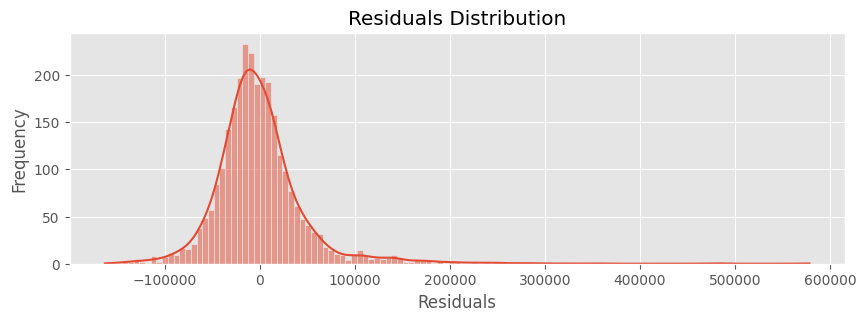

In [609]:
# Analisis Residual
residuals = result_ols.resid

# Plot residual
plt.figure(figsize=(10, 3))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

> Variance of Errors

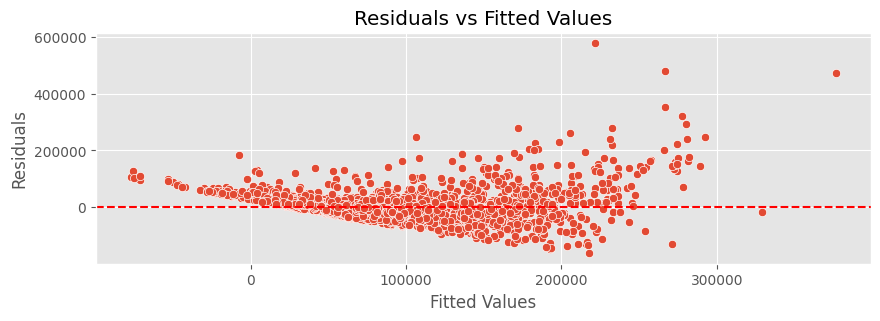

In [610]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 3))
sns.scatterplot(x=result_ols.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Based on the visualizations above, we can say that: 
1. Referring to the histogram, we can say that the residual distribution does not follow a normal distribution; it appears to be right-skewed.
2. Referring to the scatterplot of predicted values (y_pred) versus residuals, we observe a relationship indicating heteroscedasticity.

In [611]:
# VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["feature"] = x_transformed_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_transformed_df, i) for i in range(x_transformed_df.shape[1])]

vif_data

,feature,VIF
0,Transmission_Manual,1.380181
1,Country Origin_Other,1.655386
2,Country Origin_Saudi,6.169292
3,Package_Semi Full,1.737953
4,Package_Standard,2.362796
5,Car Type_0,1.094898
6,Car Type_1,1.466845
7,Car Type_2,1.765344
8,Car Type_3,2.464386
9,Car Type_4,2.142821


In [612]:
# model predict using OLS
y_pred = result_ols.predict(x_transformed_linreg)

# calculating MAE, MAPE, R2, and Adjusted R2
mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
r2 = r2_score(y, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x_transformed_linreg.shape[1] - 1)

print(f'MAE: {mae}')
print(f'MAPE: {mape}')   
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MAE: 32111.660696521612
MAPE: 42.523551406683765
R2: 0.5740173028058234
Adjusted R2: 0.56894425011459


**Conclusion for Multiple Linear Regression Model**

Based on the analysis of the multiple linear regression model, it shows that the residuals are not normally distributed and indicates right skewed distribution. The residuals vs. fitted values plot also demonstrates distinct patterns and heteroscedasticity, with residuals expanding outward as fitted values rise. This shows that the model produces skewed and inconsistent estimates because it is unable to accurately represent the underlying connection between the variables. Furthermore, the metrics derived from the data demonstrate **suboptimal performance**. Consequently, these indicators are not considered for further evaluation. It would be prudent to investigate non-linear methods, such as decision trees, polynomial regression, etc., as they are better suited to identifying underlying patterns and improving predictive accuracy.

#### **3.3 Benchmark Models**

##### `Defining the Models`

In [613]:
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=2020),
    'Random Forest Regression': RandomForestRegressor(random_state=2020),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=2020),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Xtreme Gradient Boosting' : xgb.XGBRegressor()
}


##### `Model Evaluation and Comparison`

In [614]:
# Define the adjusted R² score class
class AdjustedR2Score:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
    def __call__(self, y_true, y_pred):
        r2 = r2_score(y_true, y_pred)
        adjusted_r2 = 1 - (1 - r2) * (self.n - 1) / (self.n - self.p - 1)
        return adjusted_r2
    
    def __name__(self):
        return 'adjusted_r2_score'

# Initialize the custom adjusted R2 scorer with the number of samples and features
n_samples, n_features = X_train.shape
adjusted_r2_scorer = AdjustedR2Score(n_samples, n_features)

# Create the scorer
adjusted_r2 = make_scorer(adjusted_r2_scorer, greater_is_better=True)

# Initialize lists to store results
results = []

# Perform cross-validation and store results
for model_name, model in models.items():
    # Timing start
    start_time = time.time()
    
    # Define pipeline
    pipeline = Pipeline(steps=[('transformer', transformer), 
                               ('regressor', model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Adjusted R2 on test set
    test_adj_r2 = adjusted_r2_scorer(y_test, y_pred)
    
    # Perform cross-validation
    cv_results = cross_validate(pipeline, 
                                X_train, 
                                y_train, 
                                cv=5, 
                                scoring={'MAPE': 'neg_mean_absolute_percentage_error', 'Adj_R2': adjusted_r2},
                                return_train_score=False) 
    
    # Calculate scores
    train_mape = cv_results['test_MAPE'].mean()
    train_adj_r2 = cv_results['test_Adj_R2'].mean()
    
    # Calculate average score difference
    avg_score_diff = - train_mape - test_mape 
    avg_adj_r2_diff = train_adj_r2 - test_adj_r2 
    
    # Calculate computation time
    computation_time = time.time() - start_time

    # Model Size 
    model_size = sys.getsizeof(pickle.dumps(pipeline)) / (1024 * 1024)
    
    # Append results
    results.append({
        'Model': model_name,
        'Train MAPE': - train_mape,
        'Test MAPE': test_mape,
        'Difference MAPE': avg_score_diff,
        'Train Adj R2': train_adj_r2,
        'Test Adj R2': test_adj_r2,
        'Difference Adj R2': avg_adj_r2_diff,
        'Computation Time (seconds)': computation_time,
        'Model Size (MB)': model_size
    })

# Create DataFrame from results
benchmark_model = pd.DataFrame(results).sort_values(by='Test MAPE', ascending=True).reset_index(drop=True)

benchmark_model


,Model,Train MAPE,Test MAPE,Difference MAPE,Train Adj R2,Test Adj R2,Difference Adj R2,Computation Time (seconds),Model Size (MB)
0,Xtreme Gradient Boosting,0.204633,0.192690,0.011943,0.805811,0.797012,0.008799,0.893722,0.440192
1,Random Forest Regression,0.212268,0.197483,0.014785,0.793265,0.769523,0.023741,4.916446,18.250145
2,K-Nearest Neighbors Regression,0.232919,0.214418,0.018502,0.760373,0.725357,0.035017,0.311601,0.582319
3,Gradient Boosting Regression,0.231829,0.242277,-0.010448,0.783461,0.748011,0.035450,1.589262,0.171619
4,Decision Tree Regression,0.266232,0.260508,0.005725,0.633961,0.573220,0.060741,0.536165,0.320907
5,Ridge Regression,0.404665,0.396487,0.008178,0.607250,0.581431,0.025820,0.431780,0.034594
6,Lasso Regression,0.405431,0.397002,0.008429,0.606326,0.581682,0.024644,0.407875,0.034679


| Column                        | Description                                                                                                              |
|-------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| MAPE                          | Mean Absolute Percentage Measures the error in percentage terms, making it suitable for datasets with a wide range of values. Car prices can vary significantly, and MAPE helps to normalize these variations. MAPE is advantageous when filtering data based on a threshold because it provides a clear understanding of model performance relative to actual values, even with outliers.|
| Adjusted R²                   | Adjusted R-squared is particularly useful in analyzing data with many features (predictors), as it penalizes models that include unnecessary predictors that do not improve the model's explanatory power. providing a more accurate measure when comparing models. |
| Train Score                   | Mean score obtained from the training set during cross-validation, representing the model's performance on training data.  |
| Test Score                    | Mean score obtained from the test set during cross-validation, representing the model's performance on unseen data.        |
| Avg Score Difference          | Difference between the training and test scores. Smaller differences indicate better generalization of the model.          |
| Computation Time (seconds)    | Time taken to train and test the model.                                                                                    |
| Data Size (bytes)             | Size of the data used in the model.                                                                                        |


**Using MAPE for Car Price Prediction**

- Scalability: MAPE measures error relative to the actual values, making it suitable for datasets with a wide range of car prices. It allows for easy comparison of errors across different price levels.
- Interpretability: MAPE provides a clear percentage error, which is easily interpretable by stakeholders. This makes it easier to communicate model performance and set realistic expectations.
- Outlier Management: Given that the dataset was filtered based on a threshold rather than removing outliers, MAPE helps to understand the model's performance without being overly sensitive to extreme values.

##### `Hyperparameter Tuning for Best Model`

> **2 Best Models :** 
> 1. Xtreme Gradient Boosting 
> 2. Random Forest Regression 

i will try to do the hyperparameter tuning for these 2 models and compare the result for deciding the final model  

**1. Xtreme Gradient Boosting Tuning**

In [618]:
param_grid = {
    'regressor__n_estimators': [1200, 1300, 1500],
    'regressor__max_depth': [6, 8, 10],
    'regressor__learning_rate': [0.01, 0.02, 0.03],
    'regressor__subsample': [0.6, 0.7, 0.8],
    'regressor__colsample_bytree': [0.6, 0.7, 0.8],
    'regressor__gamma': [0, 0.1, 0.2],
}


# Create pipeline
pipeline = Pipeline(steps=[('transformer', transformer), 
                           ('regressor', xgb.XGBRegressor())])

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_xgbr = GridSearchCV(pipeline, 
                         param_grid=param_grid,
                         scoring='neg_mean_absolute_error', 
                         cv=kf, 
                         verbose=2, 
                         n_jobs=-1)

grid_xgbr.fit(X_train, y_train)

# Evaluate the model
best_xgbr = grid_xgbr.best_estimator_

y_pred_xgbr = best_xgbr.predict(X_test)

mape_xgbr = mean_absolute_percentage_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)

# Best parameters
print("Best parameters:", grid_xgbr.best_params_)

print(f"MAPE: {mape_xgbr}")

# Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2_xgbr = 1 - (1 - r2_xgbr) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adj_r2_xgbr}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters: {'regressor__colsample_bytree': 0.7, 'regressor__gamma': 0, 'regressor__learning_rate': 0.02, 'regressor__max_depth': 6, 'regressor__n_estimators': 1500, 'regressor__subsample': 0.7}
MAPE: 0.16060527623316914
Adjusted R-squared: 0.8064145521684126


**2. Random Forest Regression Tuning**

In [ ]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10, 15],
    'regressor__min_samples_leaf': [1, 2, 4, 6, 8],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__bootstrap': [True, False]
}

# Buat pipeline
pipe_rf = Pipeline(steps=[('transformer', transformer), 
                           ('regressor', RandomForestRegressor(random_state=2020))])

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_rf = GridSearchCV(pipe_rf, 
                       param_grid=param_grid, 
                       cv=kf, 
                       scoring='neg_mean_absolute_percentage_error', 
                       n_jobs=-1, 
                       verbose=2)

grid_rf.fit(X_train, y_train)

# Evaluasi model terbaik
best_model = grid_rf.best_estimator_
y_pred_rf = best_model.predict(X_test)

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Best parameters
print("Best parameters:", grid_rf.best_params_)
print(f"MAPE: {mape_rf}")
print(f"R-squared: {r2_rf}")

# Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2_rf}")


Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
Best parameters: {'regressor__bootstrap': False, 'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 400}
MAPE: 0.1830106316175455
R-squared: 0.7508965983158318
Adjusted R-squared: 0.7463674455579378


Based on the result of the Hyperparameter Tuning from the best 2 models which are Xtreme Gradient Boosting Regression (XGBR) and Random Forest Regression, we can see that the metrics result of the XGBR after tuning is higher than the Random Forest Regression, so from that approaches we can choose the XGBR as the best model.

##### `Best Model Comparison before and after Hyperparameter Tuning`

In [619]:
# Xtreme Gradient Boosting After Hyperparameter Tuning

print('Best Model : Xtreme Gradient Boosting Regressor')
print(f"MAPE: {mape_xgbr}")
print(f"Adjusted R-squared: {adj_r2_xgbr}")
print(f"Best Parameter: {grid_xgbr.best_params_}")

Best Model : Xtreme Gradient Boosting Regressor
MAPE: 0.16060527623316914
Adjusted R-squared: 0.8064145521684126
Best Parameter: {'regressor__colsample_bytree': 0.7, 'regressor__gamma': 0, 'regressor__learning_rate': 0.02, 'regressor__max_depth': 6, 'regressor__n_estimators': 1500, 'regressor__subsample': 0.7}


In [620]:
xgbr_tuned = grid_xgbr.best_estimator_
xgbr_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Transmission',
                                                   'Country Origin',
                                                   'Package']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Car Type', 'Region',
                                                   'Manufacturer',
                                                   'Country Manufacturer']),
                                                 ('scaler', RobustScaler(),
                                                  ['Year', 'Engine Size',
                                                   'Mileage'])])),
                ('regressor',
                 XGBRegressor(base_scor...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.02,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [621]:
# Timing start
start = time.time()

cv_xgbr = cross_validate(xgbr_tuned, 
                            X_train, 
                            y_train, 
                            cv=5, 
                            scoring={'MAPE': 'neg_mean_absolute_percentage_error', 'Adj_R2': make_scorer(adjusted_r2_scorer)},
                            return_train_score=False)

    
# Calculate scores from cross-validation
final_train_mape = cv_xgbr['test_MAPE'].mean()
final_train_adj_r2 = cv_xgbr['test_Adj_R2'].mean()

# Calculate average score difference
final_mape_diff = (-final_train_mape) - mape_xgbr
final_adj_r2_diff = final_train_adj_r2 - adj_r2_xgbr

# Calculate computation time
end = time.time()
final_time = end - start

# Model Size 
final_size = sys.getsizeof(pickle.dumps(xgbr_tuned)) / (1024 * 1024)

# Create DataFrame and select the best model (lowest MAPE)
df_final_model = pd.DataFrame({
    'Model': ['Xtreme Gradient Boosting Tuned'],
    'Train MAPE': [-final_train_mape],
    'Test MAPE': [mape_xgbr],
    'Difference MAPE': [final_mape_diff],
    'Train Adj R2': [final_train_adj_r2],
    'Test Adj R2': [adj_r2_xgbr],
    'Difference Adj R2': [final_adj_r2_diff],
    'Computation Time (seconds)': [final_time],
    'Model Size (MB)': [final_size]
})

# Display the DataFrame
df_final_model


,Model,Train MAPE,Test MAPE,Difference MAPE,Train Adj R2,Test Adj R2,Difference Adj R2,Computation Time (seconds),Model Size (MB)
0,Xtreme Gradient Boosting Tuned,0.178417,0.160605,0.017811,0.839916,0.806415,0.033502,9.544031,6.159827


In [622]:
# Selected Model Comparison Before and After Hyperparameter Tuning

xgbr_comparison = pd.concat([df_final_model, benchmark_model.loc[0].to_frame().T], ignore_index=True)
xgbr_comparison

,Model,Train MAPE,Test MAPE,Difference MAPE,Train Adj R2,Test Adj R2,Difference Adj R2,Computation Time (seconds),Model Size (MB)
0,Xtreme Gradient Boosting Tuned,0.178417,0.160605,0.017811,0.839916,0.806415,0.033502,9.544031,6.159827
1,Xtreme Gradient Boosting,0.204633,0.19269,0.011943,0.805811,0.797012,0.008799,0.893722,0.440192


After hyperparameter tuning, the Xtreme Gradient Boosting model demonstrated improved metrics scores compared to the initial model. Therefore, **the Xtreme Gradient Boosting model after hyperparameter tuning has been selected as the best model.**

In [623]:
final_model = xgbr_tuned
final_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Transmission',
                                                   'Country Origin',
                                                   'Package']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Car Type', 'Region',
                                                   'Manufacturer',
                                                   'Country Manufacturer']),
                                                 ('scaler', RobustScaler(),
                                                  ['Year', 'Engine Size',
                                                   'Mileage'])])),
                ('regressor',
                 XGBRegressor(base_scor...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.02,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

> **Best Model Selected : <br>
Xtreme Gradient Boosting after Hyperparameter Tuning**

#### **3.4 Feature Importance**

In [624]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features: 
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['Transmission_Manual',
 'Country Origin_Other',
 'Country Origin_Saudi',
 'Package_Semi Full',
 'Package_Standard',
 'Car Type_0',
 'Car Type_1',
 'Car Type_2',
 'Car Type_3',
 'Car Type_4',
 'Car Type_5',
 'Car Type_6',
 'Car Type_7',
 'Region_0',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Manufacturer_0',
 'Manufacturer_1',
 'Manufacturer_2',
 'Manufacturer_3',
 'Manufacturer_4',
 'Manufacturer_5',
 'Country Manufacturer_0',
 'Country Manufacturer_1',
 'Country Manufacturer_2',
 'Country Manufacturer_3',
 'Year',
 'Engine Size',
 'Mileage']

In [625]:
# assign feature importance to variable 

imp = final_model[-1].feature_importances_
imp

array([0.00522776, 0.00936929, 0.02050659, 0.02626294, 0.03450521,
       0.02003101, 0.01621611, 0.01228821, 0.01882672, 0.01247356,
       0.03724566, 0.0340104 , 0.01393375, 0.00368273, 0.00694037,
       0.01361541, 0.00593139, 0.00652001, 0.0713772 , 0.03671874,
       0.04470656, 0.03642476, 0.05601982, 0.04392087, 0.01735112,
       0.09049146, 0.07308589, 0.06991405, 0.07161447, 0.07097047,
       0.01981748], dtype=float32)

In [626]:
# to dataframe 
feature_imp = pd.DataFrame({
    'Feature': list_features, 
    'Importance': imp, 
}).sort_values(by='Importance', ascending=False)
feature_imp

,Feature,Importance
25,Country Manufacturer_1,0.090491
26,Country Manufacturer_2,0.073086
28,Year,0.071614
18,Manufacturer_0,0.071377
29,Engine Size,0.070970
27,Country Manufacturer_3,0.069914
22,Manufacturer_4,0.056020
20,Manufacturer_2,0.044707
23,Manufacturer_5,0.043921
10,Car Type_5,0.037246


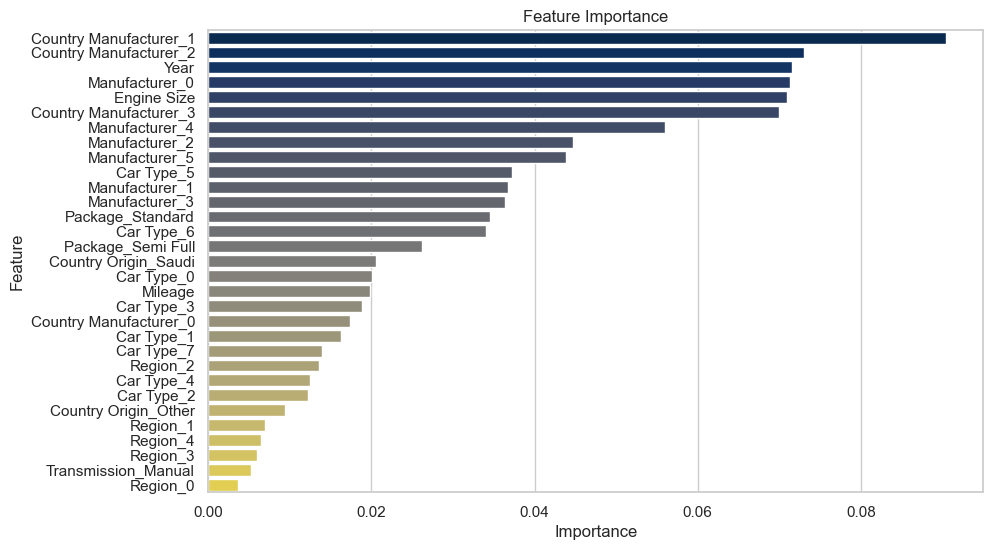

In [627]:
# Visualization 

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient = 'h', palette = 'cividis')
plt.title('Feature Importance')
plt.show()

The feature importance graph for predicting used car prices in Saudi Arabia highlights that the most crucial factors are engine size, year, and manufacturer country. This indicates that a vehicle's engine size, manufacture year, and the country of the manufacturer significantly impact its price. Notably, categories for car types and manufacturers suggest that specific brands and models also play a significant role in pricing. Attributes like "Package_Standard" and "Package_Semi Full" appear important, likely reflecting distinct feature sets or trim levels. In contrast, less impactful features include "Mileage," "Transmission_Manual," and other "Country Origin" categories. Regional factors (Region_0 to Region_4) have the least importance, suggesting geographical location within Saudi Arabia is less critical for pricing. Overall, manufacturing details, year, and engine size are the most influential factors in predicting used car prices.

## **4. Explainable AI**

In [628]:
# shap library
import shap

In [629]:
# creating test transformed dataframe from the final model
test_transformed = pd.DataFrame(
    final_model[0].transform(X_test)
    , columns = list_features)
test_transformed

,Transmission_Manual,Country Origin_Other,Country Origin_Saudi,Package_Semi Full,Package_Standard,Car Type_0,Car Type_1,Car Type_2,Car Type_3,Car Type_4,...,Manufacturer_3,Manufacturer_4,Manufacturer_5,Country Manufacturer_0,Country Manufacturer_1,Country Manufacturer_2,Country Manufacturer_3,Year,Engine Size,Mileage
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.333333,0.000000,1.294890
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.333333,0.444444,-0.647445
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.333333,0.444444,-0.377927
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-0.333333,0.444444,1.209979
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.666667,-0.500000,-0.943433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.666667,-0.611111,-0.488237
557,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-2.000000,0.722222,-0.941565
558,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.666667,-0.265346
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.333333,2.055556,0.498851


In [630]:
# explainer
explainer = shap.Explainer(
    final_model[1].predict,
    final_model[0].transform(X_test)
)
shap_values = explainer(test_transformed)

PermutationExplainer explainer: 562it [02:29,  3.70it/s]                         


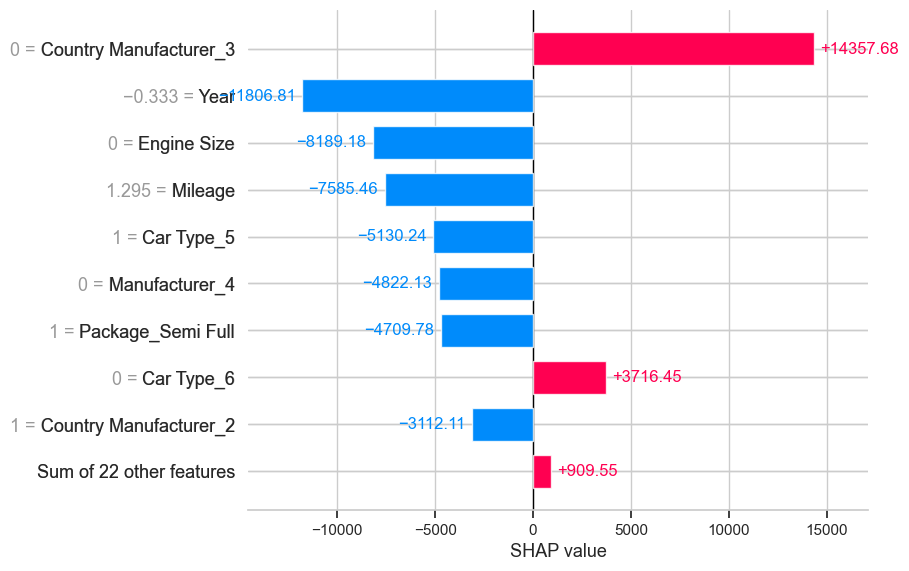

In [631]:
# shap values for explain observation in test 
shap.plots.bar(shap_values[0])

> The SHAP graph provides a clear view of how each feature contributes to the model's prediction, allowing for an understanding of feature importance and their respective influence on the target variable (car price).

The horizontal bars represent the SHAP values, indicating the impact of each feature on the model's output. Features with positive SHAP values (in red) increase the predicted car price, while those with negative SHAP values (in blue) decrease it. For instance, the feature 'Country Manufacturer_3' significantly increases the predicted price by +14,357.68, making it the most influential positive factor. On the other hand, 'Year' and 'Engine Size' considerably decrease the price, with SHAP values of -18,806.81 and -8,189.18, respectively. This visual representation is essential for understanding which features drive the model's predictions, enhancing model interpretability and transparency.


In [632]:
# shap_values for explain all features in train
X_train_trans = final_model[0].transform(X_train)

# explainer
explainer = shap.TreeExplainer(
    final_model.named_steps['regressor'],
    data = X_train_trans,
    feature_perturbation = 'interventional',
    # model_output = 'probability'
)
# shap values
shap_values = explainer(X_train_trans)

100%|===================| 2241/2244 [07:55<00:00]        

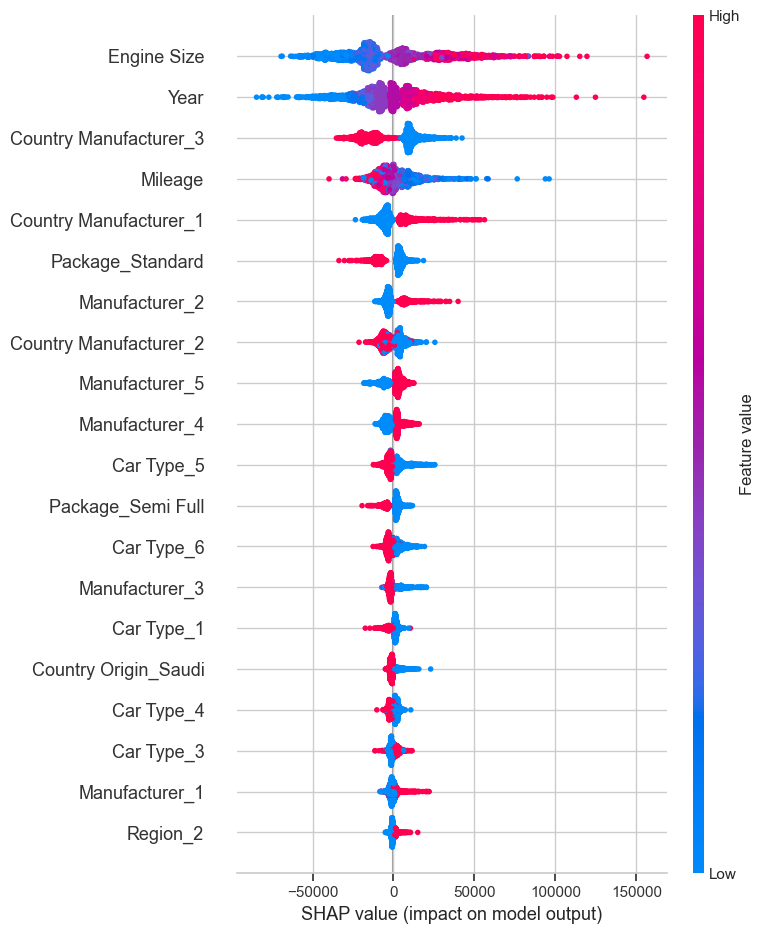

In [633]:
# shap summary 
shap.summary_plot(
    shap_values, 
    X_train_trans, 
    feature_names = list_features
)

The SHAP summary plot highlights key factors influencing car prices in Saudi Arabia's used car market. Larger engine sizes and newer models significantly increase car prices, suggesting a focus on these attributes can enhance pricing strategies. Lower mileage cars are also valued higher, so emphasizing these in marketing can boost sales. Standard package cars tend to have lower prices, indicating the benefit of offering upgraded packages. Additionally, the country of manufacture affects prices, with cars from certain countries being more valuable. Leveraging these insights can optimize inventory management, pricing, and marketing strategies for better business outcomes.

## **5. Finalizing Model**

#### **5.1 Save Final Model**

In [657]:
# import library for saving the model
import pickle 

final_model.fit(X_train, y_train)

# save best model
pickle.dump(final_model, open('Model_SaudiArabia_UsedCars.sav', 'wb'))

#### **5.2 Predict Range**

In [730]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Create the dataframe for actual and predicted values
df_range = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_pred_xgbr})
df_range.reset_index(drop=True, inplace=True)
df_range.sort_values('y_test', inplace=True)

# Define price ranges
ranges = [
    (0, 50000), (50001, 100000), (100001, 300000), (300001, 850000)
]

# Define range labels
range_labels = [
    '<50k', '50k-100k', '100k-300k', '300k-850k'
]

# Lists to store metrics
list_mape = []
list_len = []

# Calculate metrics for each price range
for min_price, max_price in ranges:
    df_range_filtered = df_range[(df_range['y_test'] > min_price) & (df_range['y_test'] <= max_price)].copy()
    if not df_range_filtered.empty:
        n = len(df_range_filtered)
        if n > 1:  # Ensure there are enough samples
            mape = mean_absolute_percentage_error(df_range_filtered['y_test'], df_range_filtered['y_test_pred'])
            list_mape.append(mape)
            list_len.append(n)
        else:
            list_mape.append(None)
            list_len.append(n)
    else:
        list_mape.append(None)
        list_len.append(0)

# Calculate metrics for all ranges
n = len(df_range)
mape_all = mean_absolute_percentage_error(df_range['y_test'], df_range['y_test_pred'])
list_mape.append(mape_all)
list_len.append(n)

# Add the label for all ranges
range_labels.append('All Range')

# Create a DataFrame for the metrics
mape_range = pd.DataFrame({
    "Range Price (SAR)": range_labels,
    "MAPE Score": list_mape,
    "Amount of Data": list_len
})

# Display the DataFrame
mape_range

,Range Price (SAR),MAPE Score,Amount of Data
0,<50k,0.196420,161
1,50k-100k,0.154129,246
2,100k-300k,0.128473,139
3,300k-850k,0.180171,15
4,All Range,0.160605,561


Focusing on MAPE (Mean Absolute Percentage Error) for these price ranges provides a straightforward measure of prediction accuracy in percentage terms, directly relevant to assessing how well the model predicts actual prices. It's easily interpretable, aligns with business contexts like pricing strategies, facilitates clear communication of prediction errors, and remains robust across varying data availability within each price range.

Based on the data, the best MAPE score is observed within the price range of 300K to 850K, indicating that the model predicts prices in this range with the lowest error. Conversely, the highest MAPE score is found in the price range below 50K, suggesting that the model exhibits the highest prediction error in this lower price range. 

---

## **6. Summary**

#### **6.1 Summary**

The Saudi Arabian used car market, integral to the automotive industry, thrives on economic conditions and consumer preferences favoring competitive pricing and accessible financing. Platforms like Syarah.com facilitate transparent transactions, offering a diverse range from everyday vehicles to luxurious SUVs. Competitive pricing strategies ensure robust market growth amid sustained high demand, as forecasted by Mordor Intelligence.

The XGBoost model has demonstrated impressive performance during testing, achieving a Test MAPE (Mean Absolute Percentage Error) of 0.1606 and a Test Adjusted R-squared of 0.8064. These metrics underscore the model’s capability to predict used car prices accurately. Notably, the model achieves its best MAPE score within the price range of 300K to 850K SAR, indicating minimal prediction error within this bracket. Conversely, the highest MAPE score occurs in the price range below 50K SAR, highlighting higher prediction errors in lower-priced vehicles. This performance showcases the model's potential to optimize pricing strategies, enhance market transparency, and empower both buyers and sellers in the dynamic Saudi Arabian used car market.

#### **6.2 Recommendations**

1. **Enhanced Pricing Strategies** <br>
Utilize the XGBoost model to refine pricing strategies dynamically on Syarah.com. Implement AI-driven insights to optimize pricing based on real-time market trends, ensuring competitiveness and maximizing revenue potential.

2. **Market Transparency Initiatives** <br>
Leverage the model’s predictive capabilities to enhance market transparency on Syarah.com. Provide users with clear insights into pricing factors, empowering informed decision-making and fostering trust among buyers and sellers.

3. **User Experience Optimization** <br>
Integrate the model seamlessly into the Syarah.com platform to provide users with accurate price predictions during browsing and listing processes. Enhance user engagement through personalized recommendations and real-time updates on pricing trends.

4. **Continuous Model Improvement** <br> 
Establish a feedback loop to continually improve the XGBoost model’s accuracy and relevance. Incorporate user feedback and market data updates to iteratively refine predictions and maintain competitive advantage.

5. **Data Governance and Compliance** <br>
Prioritize robust data management practices to safeguard user information and transactional data integrity. Ensure compliance with data privacy regulations to uphold trust and credibility among platform users.

6. **Market Expansion and User Engagement** <br>
Consider expanding the model's application to include forecasting demand, inventory management, or personalized recommendations. Engage users through transparent pricing insights and educational content on how predictions are generated.

7. **Integration and Deployment** <br>
Seamlessly integrate the XGBoost model into Syarah.com’s platform to provide users with accurate and reliable price predictions during vehicle listings and searches.

--- 

<div style="text-align: center;">
  <h1 style="background-color: grey; color: white; padding: 10px;"><strong>Thank You!</strong></h1>
</div>